In [210]:
import glob
import os

%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [211]:
samples = sorted(
    list(
        set(
            [
                x.split("/")[-1].split(".")[0]
                for x in sorted(glob.glob("downstream_analysis/DARs/*/*"))
            ]
        )
    )
)
samples

['BIO_ddseq_1',
 'BIO_ddseq_2',
 'BIO_ddseq_3',
 'BIO_ddseq_4',
 'BRO_mtscatac_1',
 'BRO_mtscatac_2',
 'CNA_10xmultiome_1',
 'CNA_10xmultiome_2',
 'CNA_10xv11_1',
 'CNA_10xv11_2',
 'CNA_10xv11_3',
 'CNA_10xv11_4',
 'CNA_10xv11_5',
 'CNA_10xv2_1',
 'CNA_10xv2_2',
 'CNA_hydrop_1',
 'CNA_hydrop_2',
 'CNA_hydrop_3',
 'CNA_mtscatac_1',
 'CNA_mtscatac_2',
 'EPF_hydrop_1',
 'EPF_hydrop_2',
 'EPF_hydrop_3',
 'EPF_hydrop_4',
 'HAR_ddseq_1',
 'HAR_ddseq_2',
 'MDC_mtscatac_1',
 'MDC_mtscatac_2',
 'OHS_s3atac_1',
 'OHS_s3atac_2',
 'SAN_10xmultiome_1',
 'SAN_10xmultiome_2',
 'STA_10xv11_1',
 'STA_10xv11_2',
 'TXG_10xv11_1',
 'TXG_10xv2_1',
 'TXG_10xv2_2',
 'UCS_ddseq_1',
 'UCS_ddseq_2',
 'VIB_10xmultiome_1',
 'VIB_10xmultiome_2',
 'VIB_10xv1_1',
 'VIB_10xv1_2',
 'VIB_10xv2_1',
 'VIB_10xv2_2',
 'VIB_hydrop_1',
 'VIB_hydrop_2']

In [212]:
samples_number_dict = {x: samples.index(x) for x in samples}
samples_number_dict

{'BIO_ddseq_1': 0,
 'BIO_ddseq_2': 1,
 'BIO_ddseq_3': 2,
 'BIO_ddseq_4': 3,
 'BRO_mtscatac_1': 4,
 'BRO_mtscatac_2': 5,
 'CNA_10xmultiome_1': 6,
 'CNA_10xmultiome_2': 7,
 'CNA_10xv11_1': 8,
 'CNA_10xv11_2': 9,
 'CNA_10xv11_3': 10,
 'CNA_10xv11_4': 11,
 'CNA_10xv11_5': 12,
 'CNA_10xv2_1': 13,
 'CNA_10xv2_2': 14,
 'CNA_hydrop_1': 15,
 'CNA_hydrop_2': 16,
 'CNA_hydrop_3': 17,
 'CNA_mtscatac_1': 18,
 'CNA_mtscatac_2': 19,
 'EPF_hydrop_1': 20,
 'EPF_hydrop_2': 21,
 'EPF_hydrop_3': 22,
 'EPF_hydrop_4': 23,
 'HAR_ddseq_1': 24,
 'HAR_ddseq_2': 25,
 'MDC_mtscatac_1': 26,
 'MDC_mtscatac_2': 27,
 'OHS_s3atac_1': 28,
 'OHS_s3atac_2': 29,
 'SAN_10xmultiome_1': 30,
 'SAN_10xmultiome_2': 31,
 'STA_10xv11_1': 32,
 'STA_10xv11_2': 33,
 'TXG_10xv11_1': 34,
 'TXG_10xv2_1': 35,
 'TXG_10xv2_2': 36,
 'UCS_ddseq_1': 37,
 'UCS_ddseq_2': 38,
 'VIB_10xmultiome_1': 39,
 'VIB_10xmultiome_2': 40,
 'VIB_10xv1_1': 41,
 'VIB_10xv1_2': 42,
 'VIB_10xv2_1': 43,
 'VIB_10xv2_2': 44,
 'VIB_hydrop_1': 45,
 'VIB_hydrop_2': 4

For the DARs:

In [213]:
cell_types_numbers_dict = {
    "Dendritic_cell": "a",
    "Cytotoxic_T_cell": "b",
    "Natural_killer_cell": "c",
    "DARs_dict.pkl": "d",
    "CD14+_monocyte": "e",
    "CD16+_monocyte": "f",
    "B_cell": "g",
    "CD4+_T_cell": "h",
}

In [214]:
cell_types = list(
    set(
        [
            x.split("/")[-1].split("__")[1]
            for x in sorted(glob.glob("downstream_analysis/DARs/*/*"))
        ]
    )
)
for cell_type in cell_types:
    paths = sorted(glob.glob(f"downstream_analysis/DARs/*/*{cell_type}__DARs.bed"))
    for path in paths:
        sample = path.split("/")[-1].split(".")[0]
        cell_type_path = f"upset_mergepeaks/DARs/"
        if not os.path.exists(cell_type_path):
            os.mkdir(cell_type_path)

        symlink_path = f"{cell_type_path}/{cell_types_numbers_dict[cell_type]}_{samples_number_dict[sample]}"
        if not os.path.exists(symlink_path):
            os.symlink(f"../../{path}", f"{symlink_path}")

For the  cell/sample-specific peaks:

In [215]:
cell_types_numbers_dict = {
    "CD16_monocyte": "i",
    "CD4_Tcell": "j",
    "CD14_monocyte": "k",
    "Naturalkillercell": "l",
    "Dendriticcell": "m",
    "CytotoxicTcell": "n",
    "Bcell": "o",
}

In [216]:
cell_types = list(
    set(
        [
            x.split("/")[-1].split("_p")[0]
            for x in sorted(glob.glob("final_consensus_peaks/*/*_peaks.narrowPeak"))
        ]
    )
)

for cell_type in cell_types:
    paths = sorted(glob.glob(f"final_consensus_peaks/*/*{cell_type}*_peaks.narrowPeak"))
    for path in paths:
        sample = path.split("/")[-2].split(".")[0]
        cell_type_path = f"upset_mergepeaks/peaks/"
        if not os.path.exists(cell_type_path):
            os.mkdir(cell_type_path)

        symlink_path = f"{cell_type_path}/{cell_types_numbers_dict[cell_type]}_{samples_number_dict[sample]}"
        if not os.path.exists(symlink_path):
            os.symlink(f"../../{path}", f"{symlink_path}")

For the final consensus peaks:

In [217]:
paths = sorted(glob.glob(f"final_consensus_peaks/*consensus_peaks.bed"))
for path in paths:
    sample = path.split("/")[-1].split(".")[0]
    cell_type_path = f"upset_mergepeaks/consensus_peaks/"
    if not os.path.exists(cell_type_path):
        os.mkdir(cell_type_path)

    symlink_path = f"{cell_type_path}/{samples_number_dict[sample]}"
    if not os.path.exists(symlink_path):
        os.symlink(f"../../{path}", f"{symlink_path}")

# then use mergepeaks on the consensus peaks

In [311]:
# print(cell_type)
peak_paths = " ".join(
    [x.split("/")[-1] for x in sorted(glob.glob("upset_mergepeaks/consensus_peaks/*"))]
)
command = f"mergePeaks -d given {peak_paths} -prefix FIXEDCELLS_{cell_type}_peaks__ -venn FIXEDCELLS__consensus_peaks_venn.txt -matrix FIXEDCELLS__consensus_peaks_matrix.txt > FIXEDCELLS__consensus_peaks_overlap.bed"
print(command)

mergePeaks -d given 0 1 10 11 12 13 14 15 16 17 18 19 2 20 21 22 23 24 25 26 27 28 29 3 30 31 32 33 34 35 36 37 38 39 4 40 41 42 43 44 45 46 5 6 7 8 9 -prefix FIXEDCELLS_Bcell_peaks__ -venn FIXEDCELLS__consensus_peaks_venn.txt -matrix FIXEDCELLS__consensus_peaks_matrix.txt > FIXEDCELLS__consensus_peaks_overlap.bed


# and the same for the DARs and peaks of cell types in individual samples:

In [63]:
peak_paths = [x.split("/")[-1] for x in peak_paths]

In [83]:
parallel_filename = "upset_mergepeaks/peaks/homer_mergepeaks.parallel"

with open(parallel_filename, "w") as f:
    cell_types = set(
        [
            x.split("/")[-1].split("_")[0]
            for x in sorted(glob.glob("upset_mergepeaks/peaks/*"))
        ]
    )
    for cell_type in cell_types:
        # print(cell_type)
        peak_paths = sorted(glob.glob(f"upset_mergepeaks/peaks/{cell_type}*"))
        peak_paths = [x.split("/")[-1] for x in peak_paths]
        command = f"mergePeaks -d given {' '.join(peak_paths)} -prefix FIXEDCELLS_{cell_type}_peaks__ -venn FIXEDCELLS__{cell_type}_peaks_venn.txt -matrix {cell_type}_peaks_matrix.txt > FIXEDCELLS__{cell_type}_peaks_overlap.bed && rm FIXEDCELLS_{cell_type}_peaks___*"
        f.write(f"{command}\n")
        print(command)

mergePeaks -d given k_0 k_1 k_10 k_11 k_12 k_13 k_14 k_15 k_16 k_17 k_18 k_19 k_2 k_20 k_21 k_22 k_23 k_24 k_25 k_26 k_27 k_28 k_29 k_3 k_30 k_31 k_32 k_33 k_34 k_35 k_36 k_37 k_38 k_39 k_4 k_40 k_41 k_42 k_43 k_44 k_45 k_46 k_5 k_6 k_7 k_8 k_9 k_peaks_matrix.txt.count.matrix.txt k_peaks_matrix.txt.logPvalue.matrix.txt k_peaks_matrix.txt.logRatio.matrix.txt -prefix FIXEDCELLS_k_peaks__ -venn FIXEDCELLS__k_peaks_venn.txt -matrix k_peaks_matrix.txt > FIXEDCELLS__k_peaks_overlap.bed && rm FIXEDCELLS_k_peaks___*


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



mergePeaks -d given n_0 n_1 n_10 n_11 n_12 n_13 n_14 n_15 n_16 n_17 n_18 n_19 n_2 n_20 n_21 n_22 n_23 n_24 n_25 n_26 n_27 n_28 n_29 n_3 n_30 n_31 n_32 n_34 n_35 n_36 n_37 n_38 n_39 n_4 n_40 n_41 n_42 n_43 n_44 n_45 n_46 n_5 n_6 n_7 n_8 n_9 n_peaks_matrix.txt.count.matrix.txt n_peaks_matrix.txt.logPvalue.matrix.txt n_peaks_matrix.txt.logRatio.matrix.txt -prefix FIXEDCELLS_n_peaks__ -venn FIXEDCELLS__n_peaks_venn.txt -matrix n_peaks_matrix.txt > FIXEDCELLS__n_peaks_overlap.bed && rm FIXEDCELLS_n_peaks___*
mergePeaks -d given l_0 l_1 l_10 l_11 l_12 l_13 l_14 l_19 l_2 l_21 l_24 l_25 l_26 l_27 l_28 l_3 l_30 l_31 l_32 l_33 l_34 l_35 l_36 l_37 l_38 l_39 l_4 l_40 l_41 l_42 l_43 l_44 l_5 l_6 l_7 l_8 l_9 l_peaks_matrix.txt.count.matrix.txt l_peaks_matrix.txt.logPvalue.matrix.txt l_peaks_matrix.txt.logRatio.matrix.txt -prefix FIXEDCELLS_l_peaks__ -venn FIXEDCELLS__l_peaks_venn.txt -matrix l_peaks_matrix.txt > FIXEDCELLS__l_peaks_overlap.bed && rm FIXEDCELLS_l_peaks___*
mergePeaks -d given o_0 o_1

In [82]:
parallel_filename = "upset_mergepeaks/DARs/homer_mergepeaks.parallel"

with open(parallel_filename, "w") as f:
    cell_types = set(
        [
            x.split("/")[-1].split("_")[0]
            for x in sorted(glob.glob("upset_mergepeaks/DARs/*"))
        ]
    )
    for cell_type in cell_types:
        # print(cell_type)
        peak_paths = sorted(glob.glob(f"upset_mergepeaks/DARs/{cell_type}*"))
        peak_paths = [x.split("/")[-1] for x in peak_paths]
        command = f"mergePeaks -d given {' '.join(peak_paths)} -prefix FIXEDCELLS_{cell_type}_dars__ -venn FIXEDCELLS__{cell_type}_dars_venn.txt -matrix {cell_type}_dars_matrix.txt > FIXEDCELLS__{cell_type}_dars_overlap.bed && rm FIXEDCELLS_{cell_type}_dars___*"
        f.write(f"{command}\n")
        print(command)

mergePeaks -d given e_0 e_1 e_10 e_11 e_12 e_13 e_14 e_15 e_16 e_17 e_18 e_19 e_2 e_20 e_21 e_22 e_23 e_24 e_25 e_26 e_27 e_28 e_29 e_3 e_30 e_31 e_32 e_33 e_34 e_35 e_36 e_37 e_38 e_39 e_4 e_40 e_41 e_42 e_43 e_44 e_45 e_46 e_5 e_6 e_7 e_8 e_9 -prefix FIXEDCELLS_e_dars__ -venn FIXEDCELLS__e_dars_venn.txt -matrix e_dars_matrix.txt > FIXEDCELLS__e_dars_overlap.bed && rm FIXEDCELLS_e_dars___*
mergePeaks -d given f_11 f_13 f_14 f_2 f_22 f_24 f_25 f_26 f_3 f_30 f_31 f_32 f_33 f_34 f_35 f_36 f_4 f_41 f_42 f_43 f_44 f_45 f_5 f_8 -prefix FIXEDCELLS_f_dars__ -venn FIXEDCELLS__f_dars_venn.txt -matrix f_dars_matrix.txt > FIXEDCELLS__f_dars_overlap.bed && rm FIXEDCELLS_f_dars___*
mergePeaks -d given g_0 g_1 g_10 g_11 g_12 g_13 g_14 g_16 g_18 g_19 g_2 g_20 g_21 g_22 g_23 g_24 g_25 g_26 g_27 g_28 g_29 g_3 g_30 g_31 g_32 g_33 g_34 g_35 g_36 g_37 g_38 g_39 g_4 g_40 g_41 g_42 g_43 g_44 g_45 g_46 g_5 g_6 g_7 g_8 g_9 -prefix FIXEDCELLS_g_dars__ -venn FIXEDCELLS__g_dars_venn.txt -matrix g_dars_matrix.txt

In [ ]:
cat homer_mergepeaks.parallel | parallel -j 16 --progress

# Create upset plots

In [84]:
import upsetplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [149]:
samples_number_dict = {x: samples.index(x) for x in samples}
samples_number_dict_reversed = {
    str(samples_number_dict[x]): str(x) for x in samples_number_dict.keys()
}
samples_number_dict_reversed

{'0': 'BIO_ddseq_1',
 '1': 'BIO_ddseq_2',
 '2': 'BIO_ddseq_3',
 '3': 'BIO_ddseq_4',
 '4': 'BRO_mtscatac_1',
 '5': 'BRO_mtscatac_2',
 '6': 'CNA_10xmultiome_1',
 '7': 'CNA_10xmultiome_2',
 '8': 'CNA_10xv11_1',
 '9': 'CNA_10xv11_2',
 '10': 'CNA_10xv11_3',
 '11': 'CNA_10xv11_4',
 '12': 'CNA_10xv11_5',
 '13': 'CNA_10xv2_1',
 '14': 'CNA_10xv2_2',
 '15': 'CNA_hydrop_1',
 '16': 'CNA_hydrop_2',
 '17': 'CNA_hydrop_3',
 '18': 'CNA_mtscatac_1',
 '19': 'CNA_mtscatac_2',
 '20': 'EPF_hydrop_1',
 '21': 'EPF_hydrop_2',
 '22': 'EPF_hydrop_3',
 '23': 'EPF_hydrop_4',
 '24': 'HAR_ddseq_1',
 '25': 'HAR_ddseq_2',
 '26': 'MDC_mtscatac_1',
 '27': 'MDC_mtscatac_2',
 '28': 'OHS_s3atac_1',
 '29': 'OHS_s3atac_2',
 '30': 'SAN_10xmultiome_1',
 '31': 'SAN_10xmultiome_2',
 '32': 'STA_10xv11_1',
 '33': 'STA_10xv11_2',
 '34': 'TXG_10xv11_1',
 '35': 'TXG_10xv2_1',
 '36': 'TXG_10xv2_2',
 '37': 'UCS_ddseq_1',
 '38': 'UCS_ddseq_2',
 '39': 'VIB_10xmultiome_1',
 '40': 'VIB_10xmultiome_2',
 '41': 'VIB_10xv1_1',
 '42': 'VIB_10x

In [194]:
import matplotlib.pyplot as plt

In [195]:
import upsetplot
from upsetplot import from_memberships

In [291]:
cell_types_numbers_dict = {
    "CD16_monocyte": "i",
    "CD4_Tcell": "j",
    "CD14_monocyte": "k",
    "Naturalkillercell": "l",
    "Dendriticcell": "m",
    "CytotoxicTcell": "n",
    "Bcell": "o",
}
cell_types_numbers_dict_reversed = {
    str(cell_types_numbers_dict[x]): str(x) for x in cell_types_numbers_dict.keys()
}

upset_mergepeaks/FIXEDCELLS__i_peaks_venn.txt
upset_mergepeaks/FIXEDCELLS__j_peaks_venn.txt
upset_mergepeaks/FIXEDCELLS__k_peaks_venn.txt
upset_mergepeaks/FIXEDCELLS__l_peaks_venn.txt
upset_mergepeaks/FIXEDCELLS__m_peaks_venn.txt
upset_mergepeaks/FIXEDCELLS__n_peaks_venn.txt
upset_mergepeaks/FIXEDCELLS__o_peaks_venn.txt


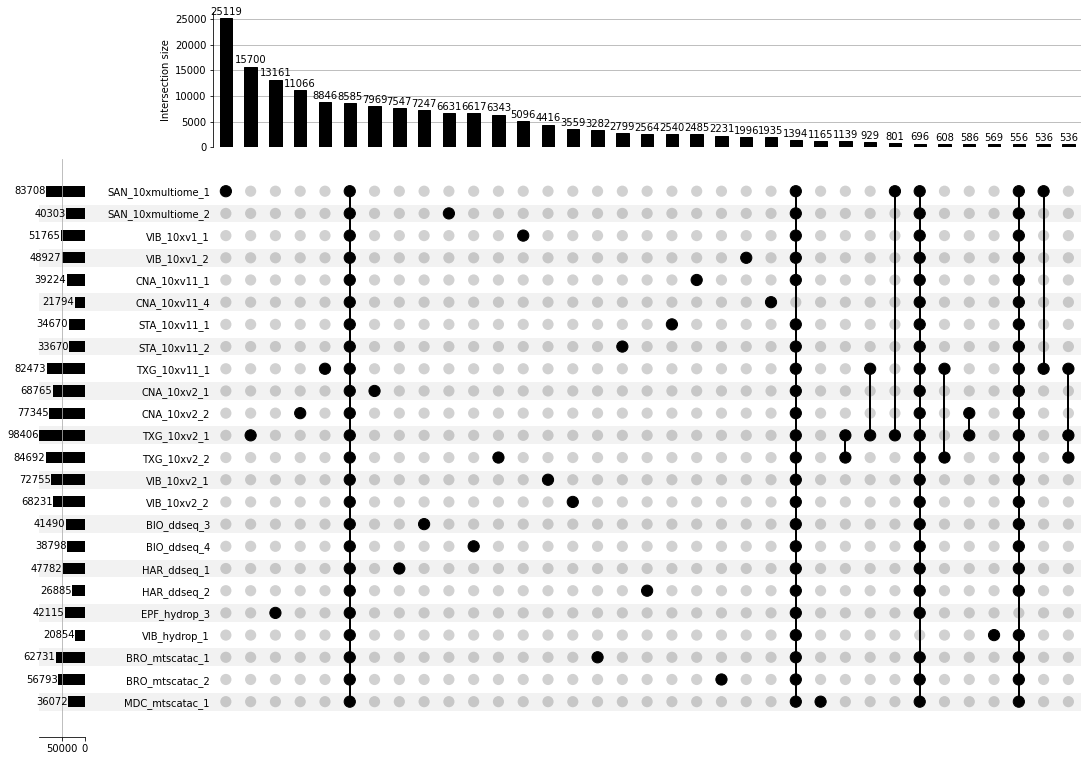

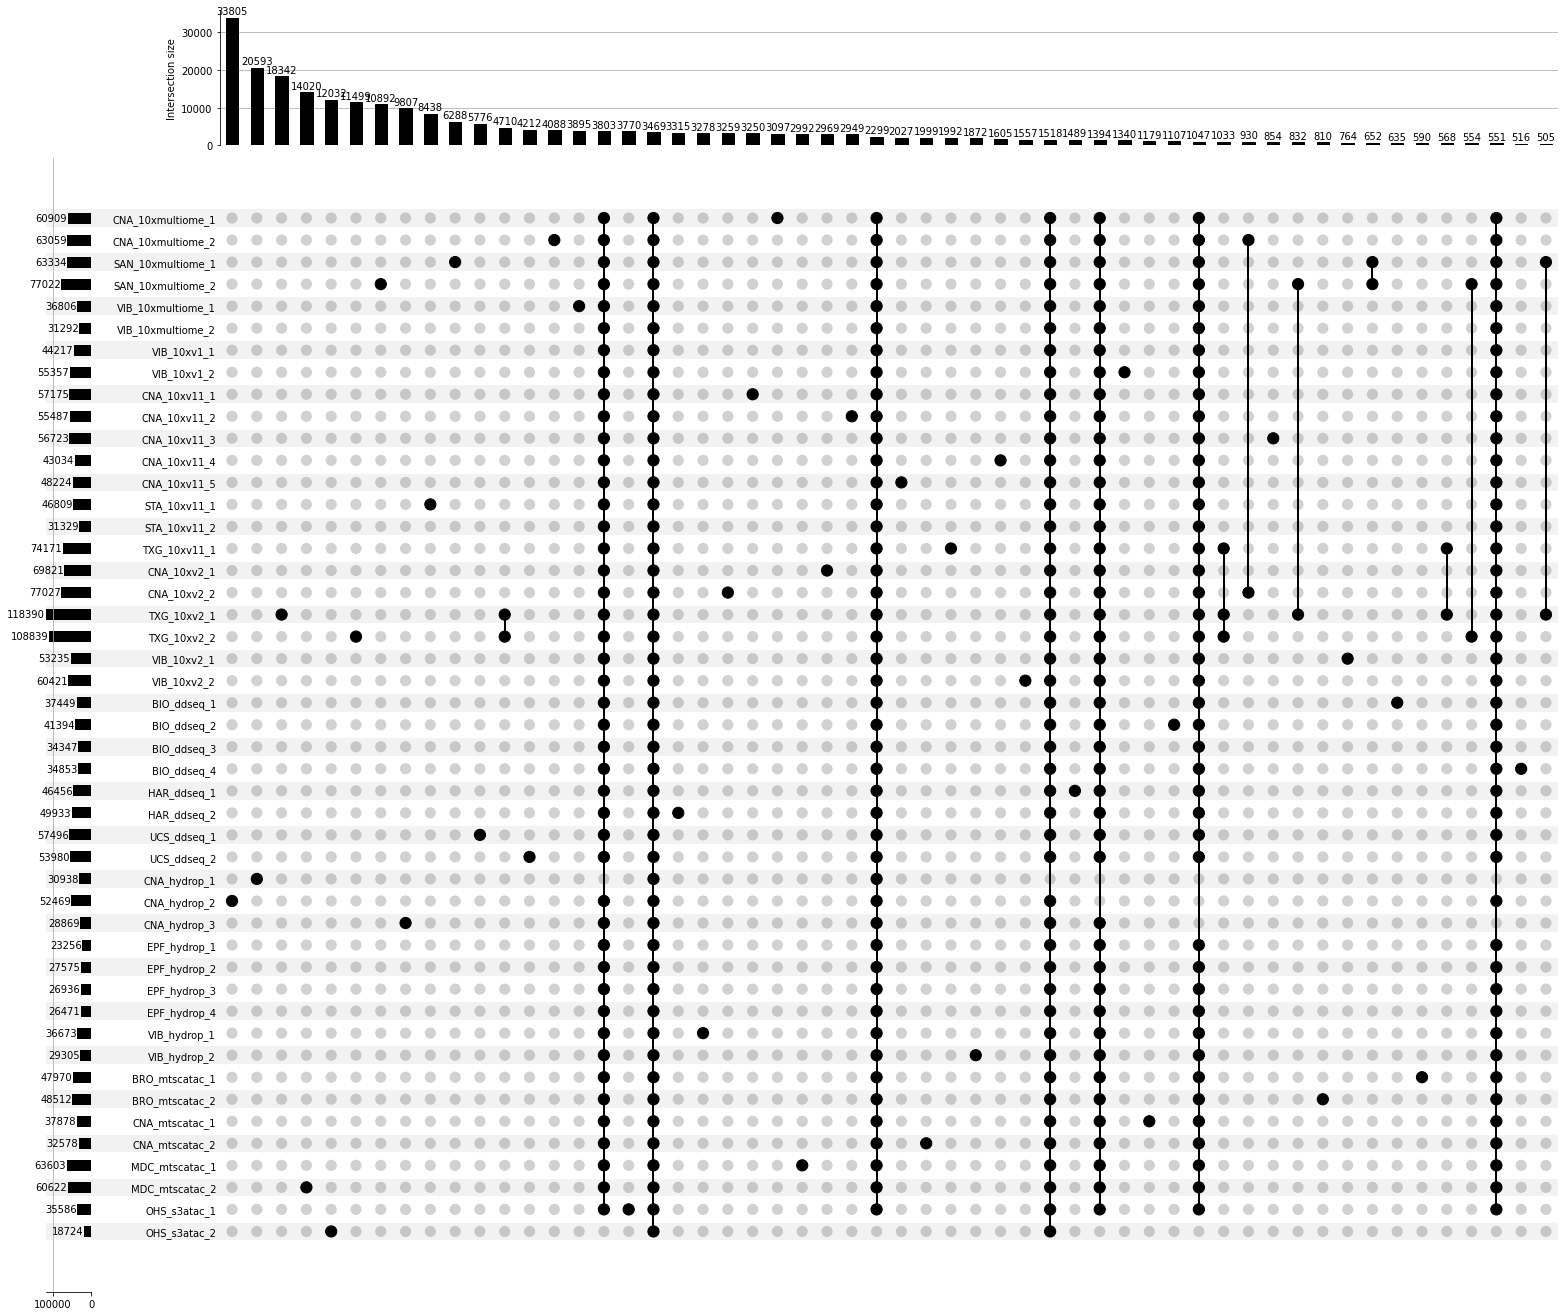

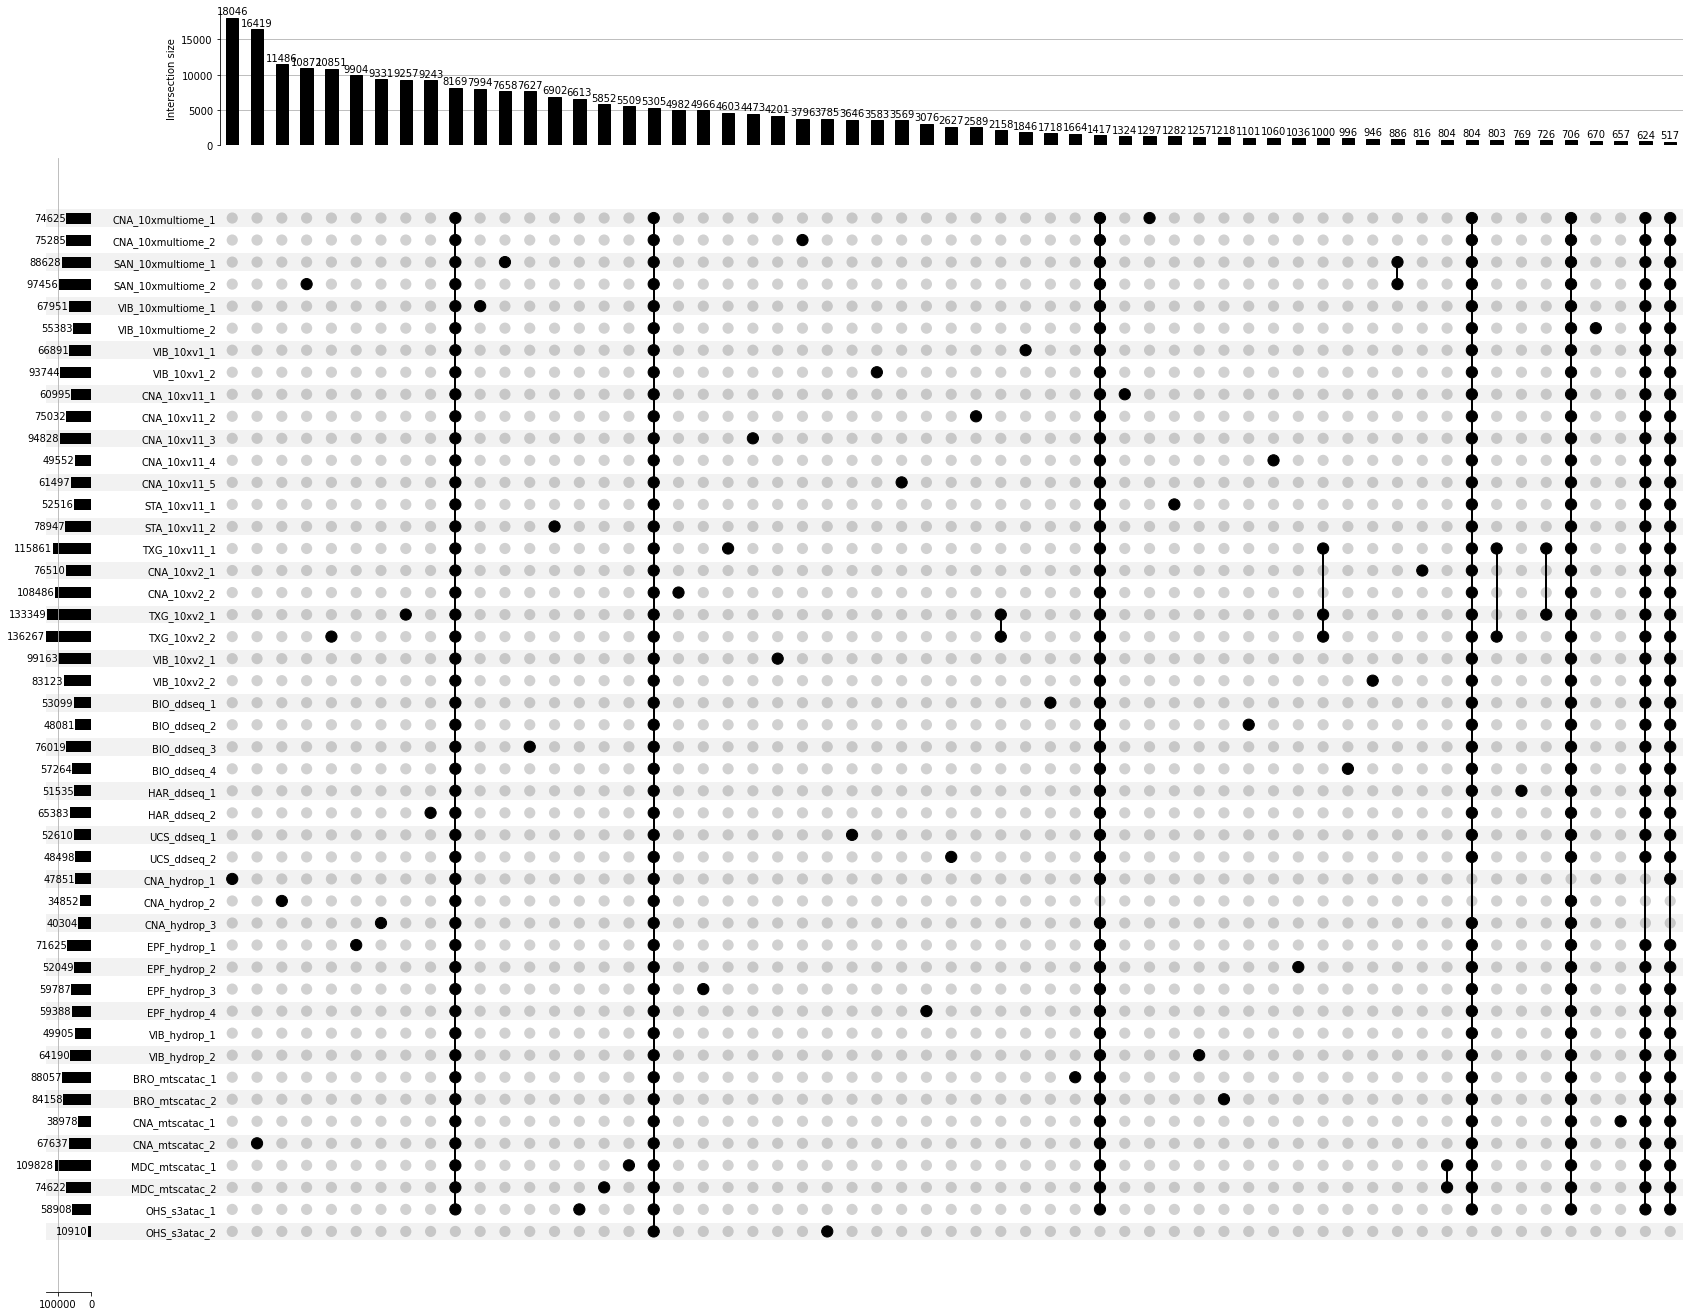

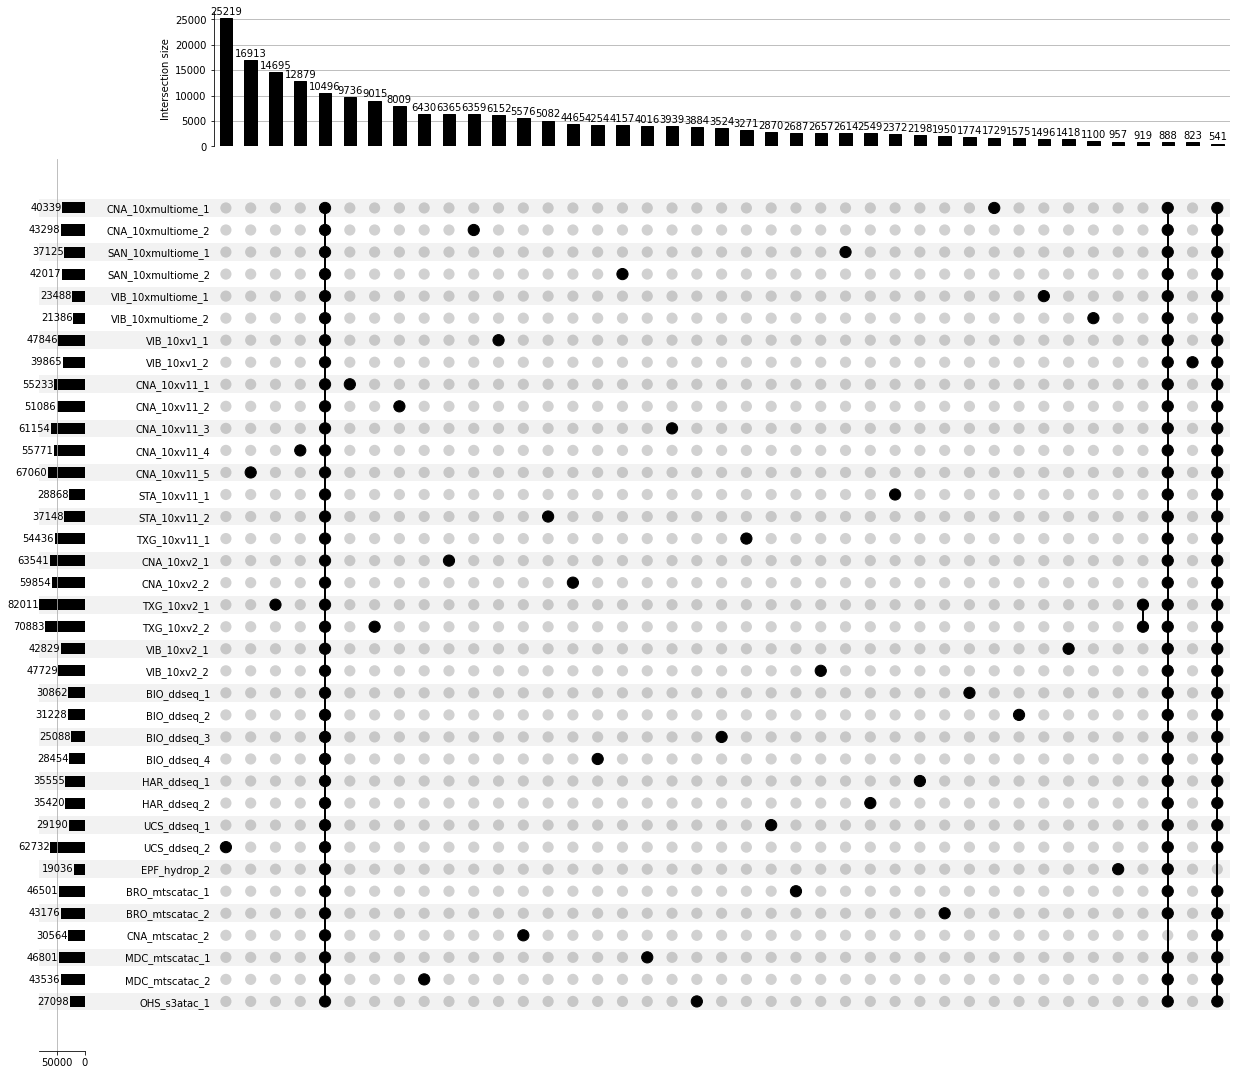

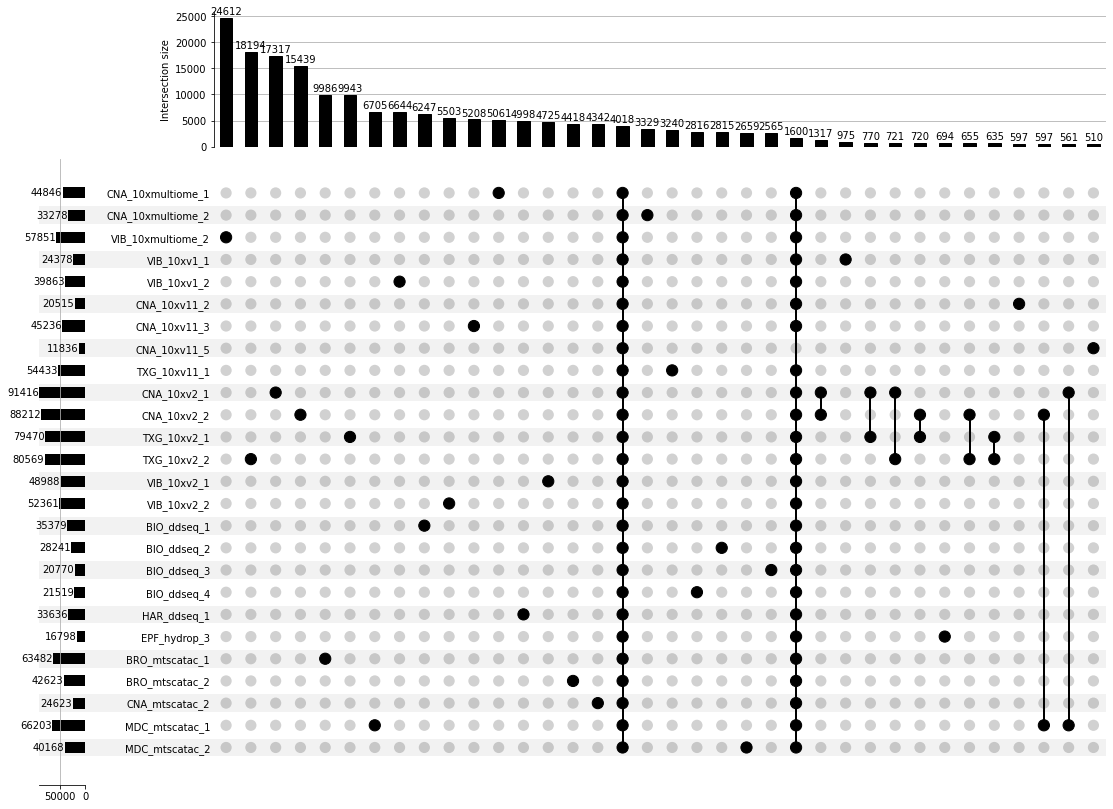

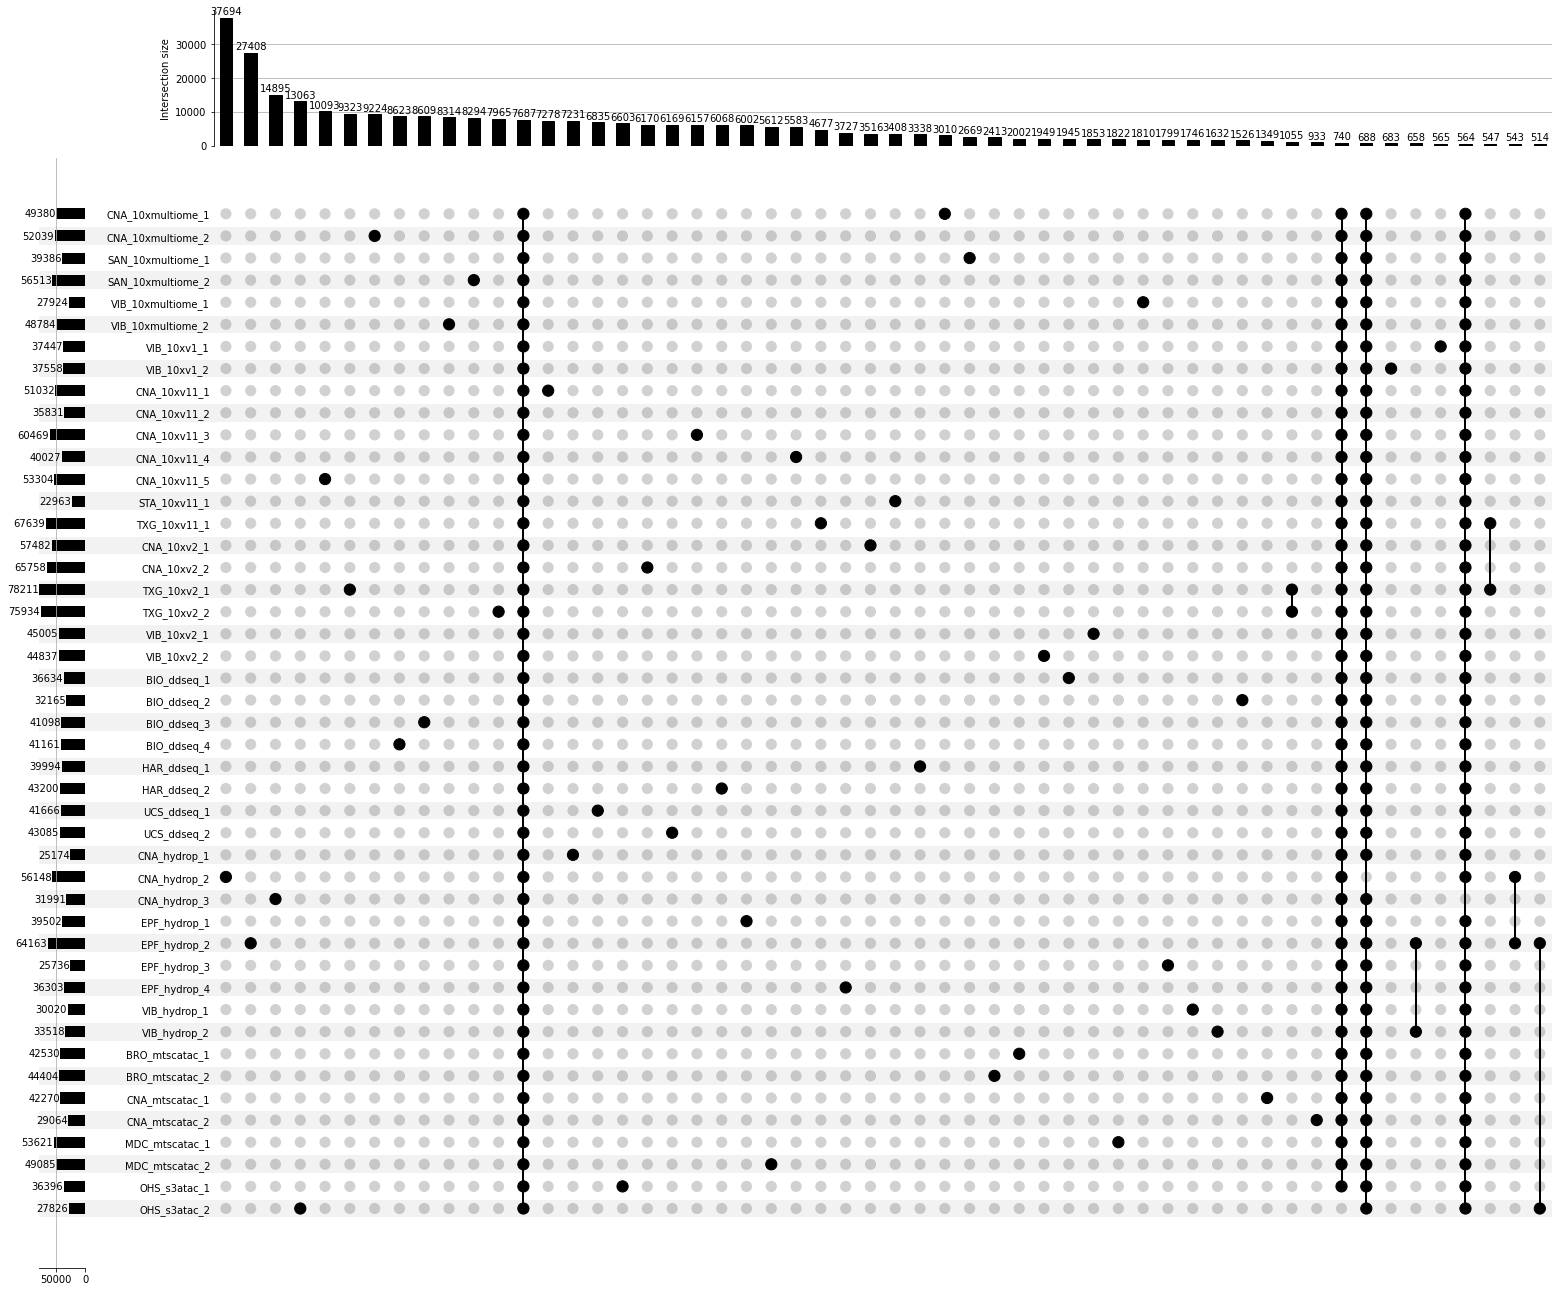

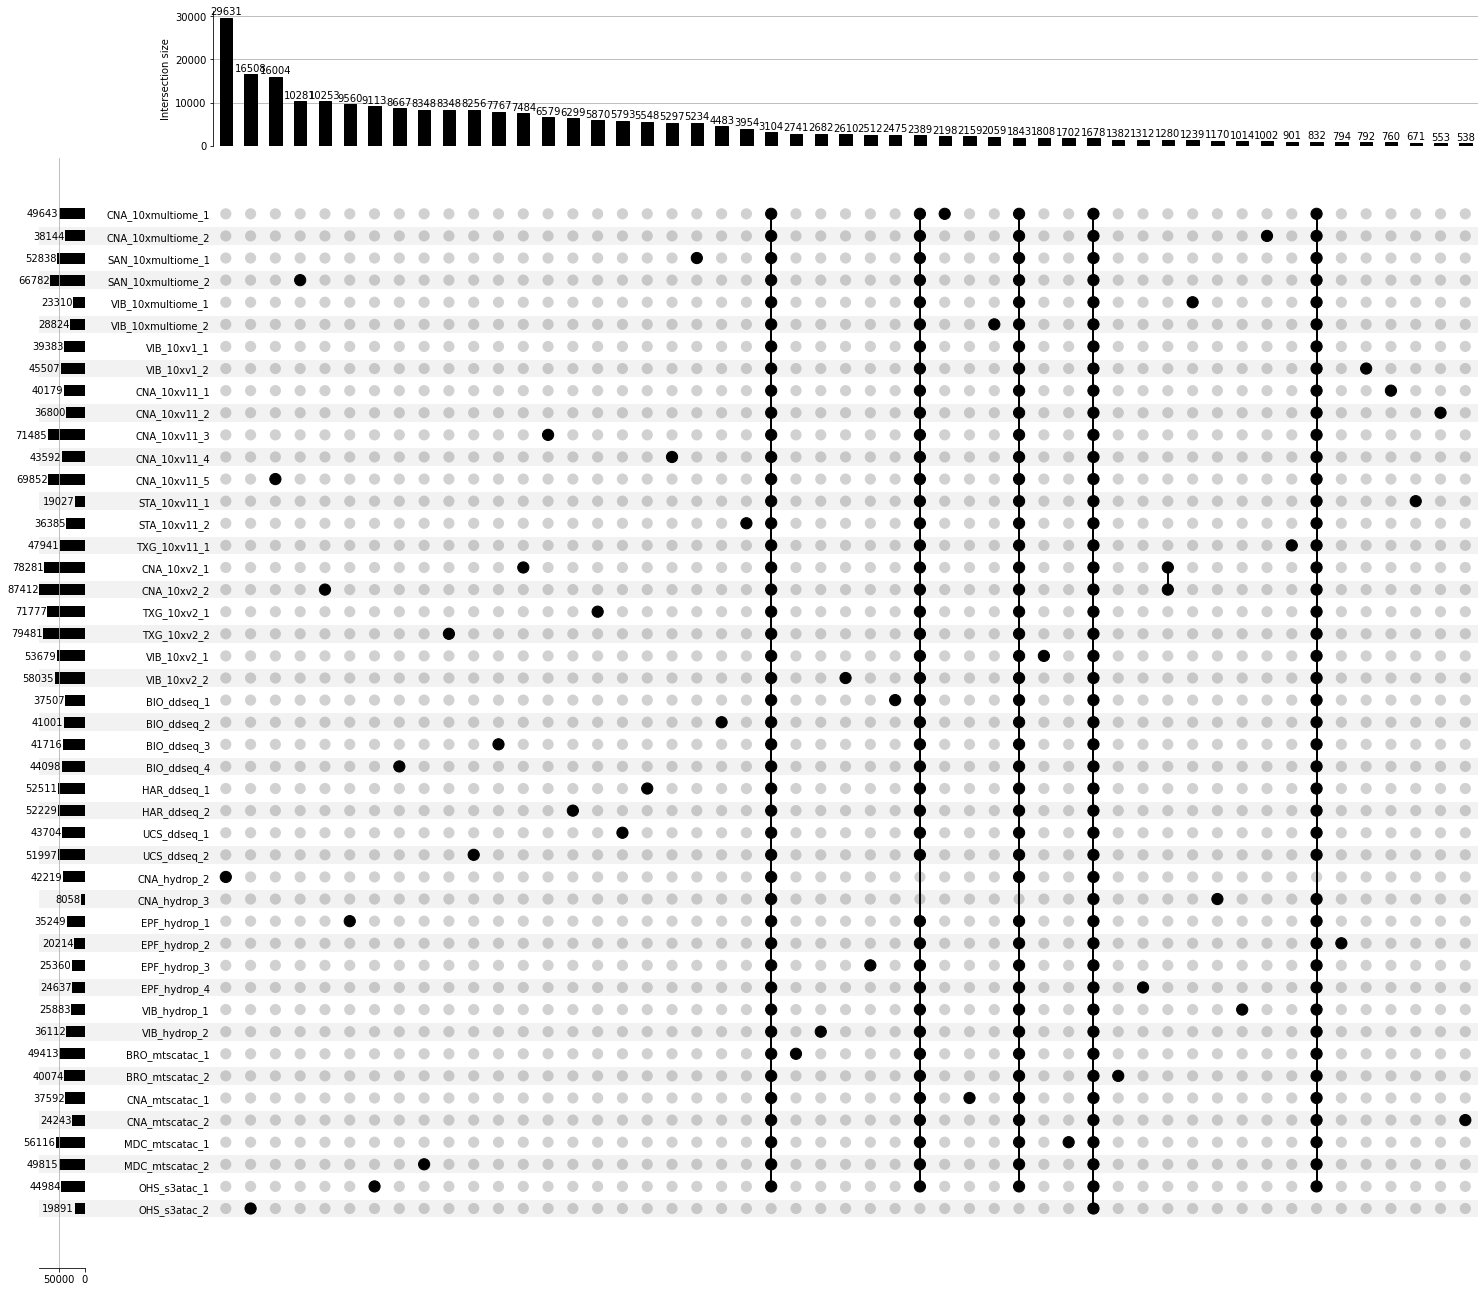

In [300]:
for venn_path in sorted(glob.glob("upset_mergepeaks/*peaks*venn.txt")):
    df = pd.read_csv(venn_path, sep="\t")
    names = [
        samples_number_dict_reversed[x.split("_")[-1]] for x in df.columns[:-2]
    ] + list(df.columns[-2:])
    df.columns = names
    df["Name"] = [
        "|".join([samples_number_dict_reversed[y.split("_")[-1]] for y in x.split("|")])
        for x in df["Name"]
    ]
    df_formated = from_memberships(df.Name.str.split("|"), data=df)
    df_order = pd.DataFrame([x.split("_") for x in list(df_formated.index.names)])
    df_order = df_order.sort_values(by=[1, 0, 2])

    list_order = ["_".join(x) for x in df_order.values.tolist()]
    list_order.reverse()

    df_formated = df_formated.reorder_levels(order=list_order)
    upset_obj = UpSet(
        df_formated,
        min_subset_size=500,
        show_counts=True,
        sum_over="Total",
        sort_by="cardinality",
        sort_categories_by=None,
    )
    print(venn_path)
    upset_obj.plot()
    cell_type_index = venn_path.split("_")[3]
    cell_type = cell_types_numbers_dict_reversed[cell_type_index]
    plt.savefig(
        f"plts_upset/peaks_upset_{cell_type}.png",
        dpi=300,
        transparent=False,
        facecolor="white",
    )

KeyError: 'mergepeaks.parallel'

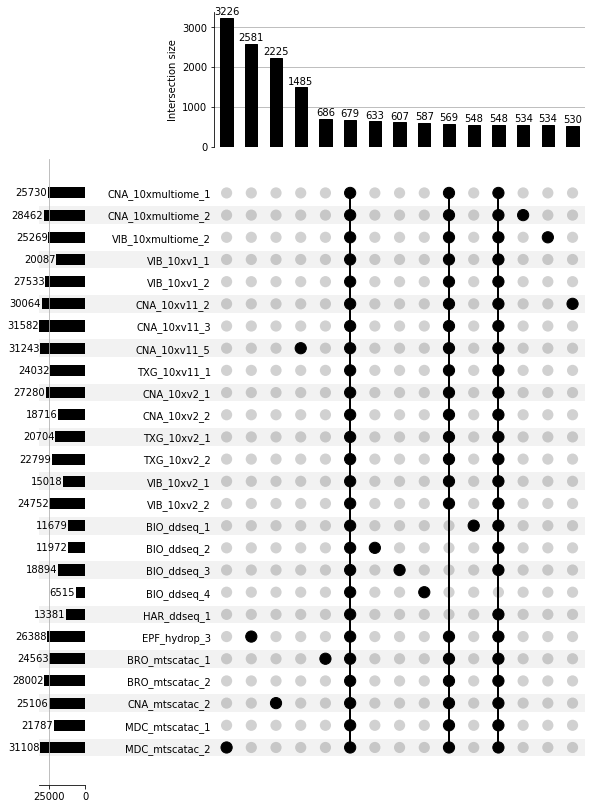

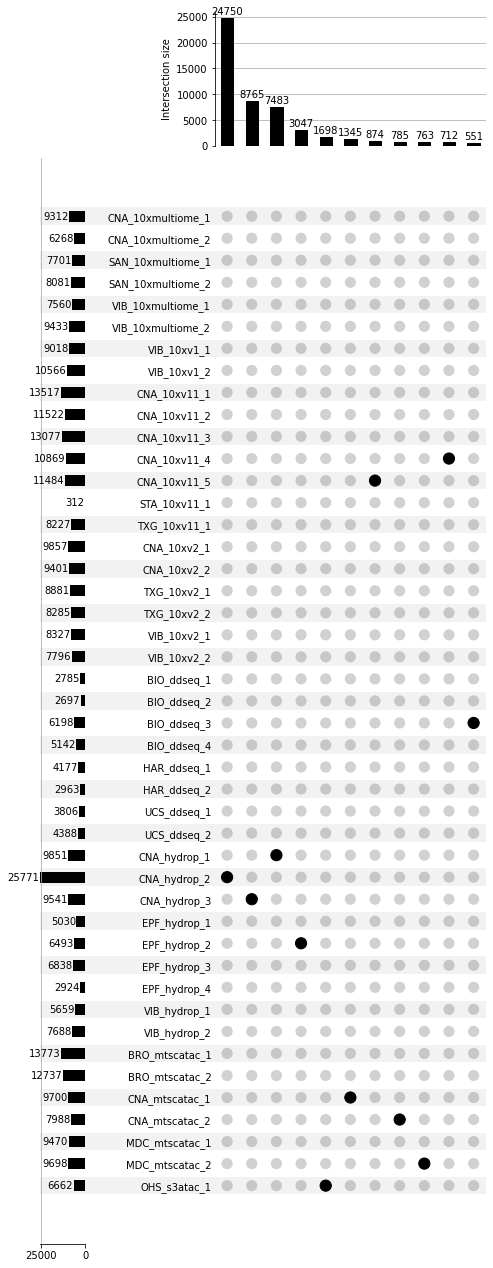

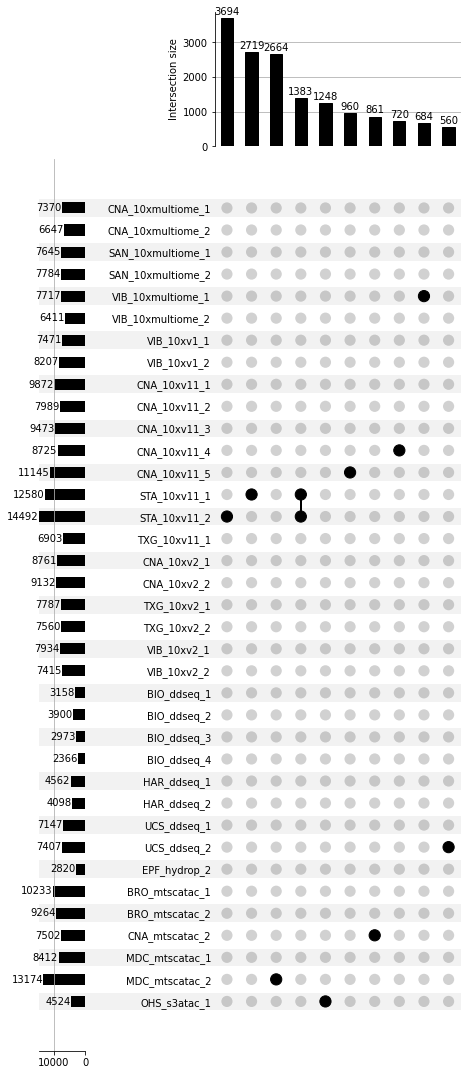

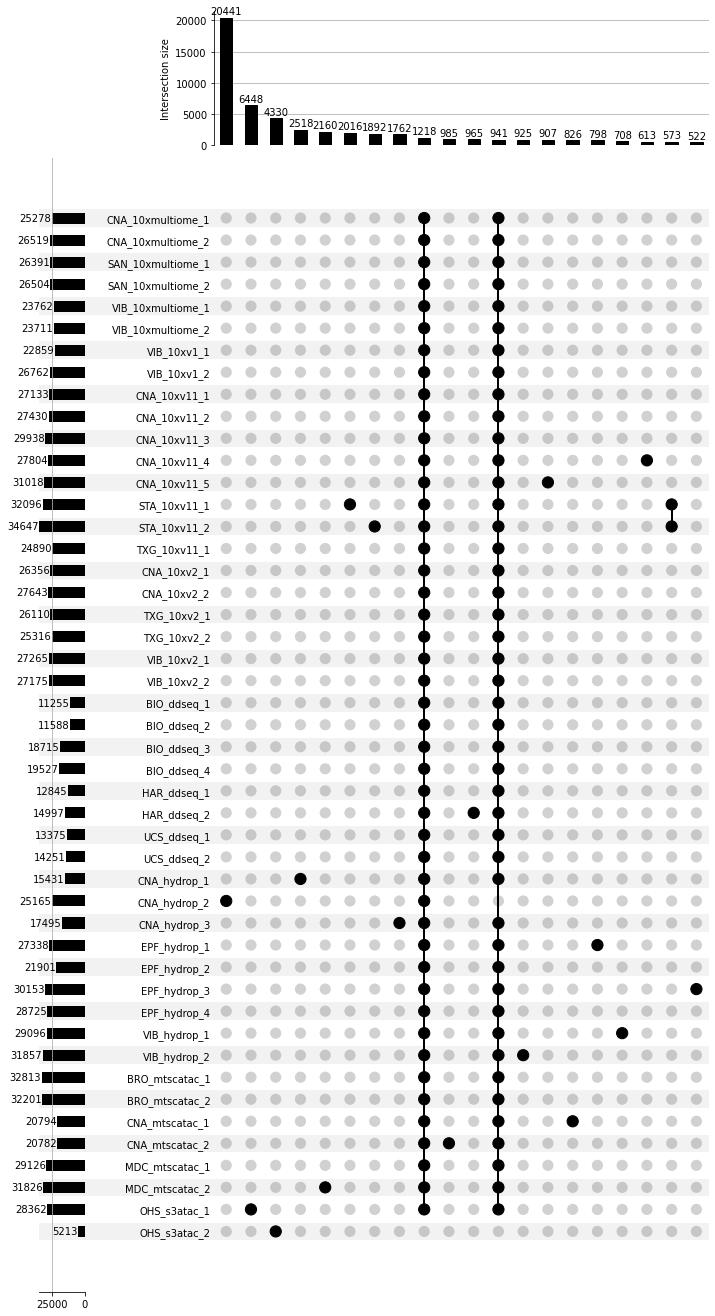

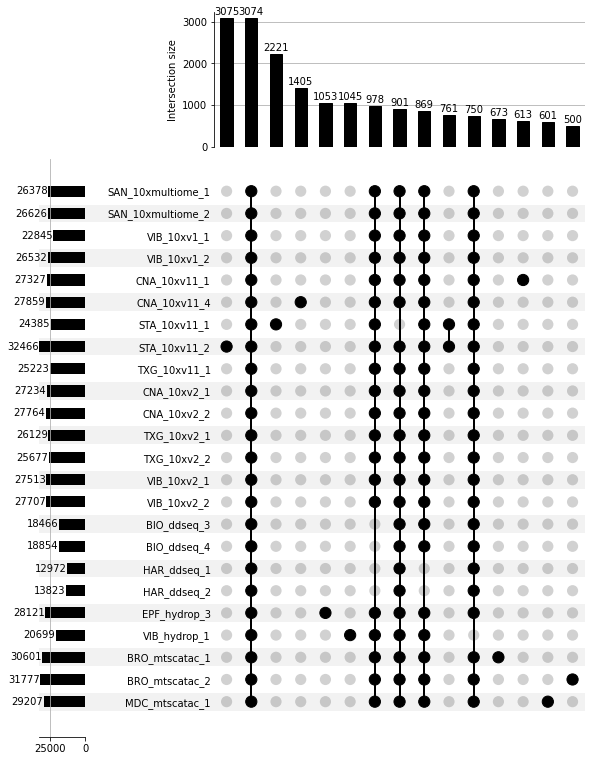

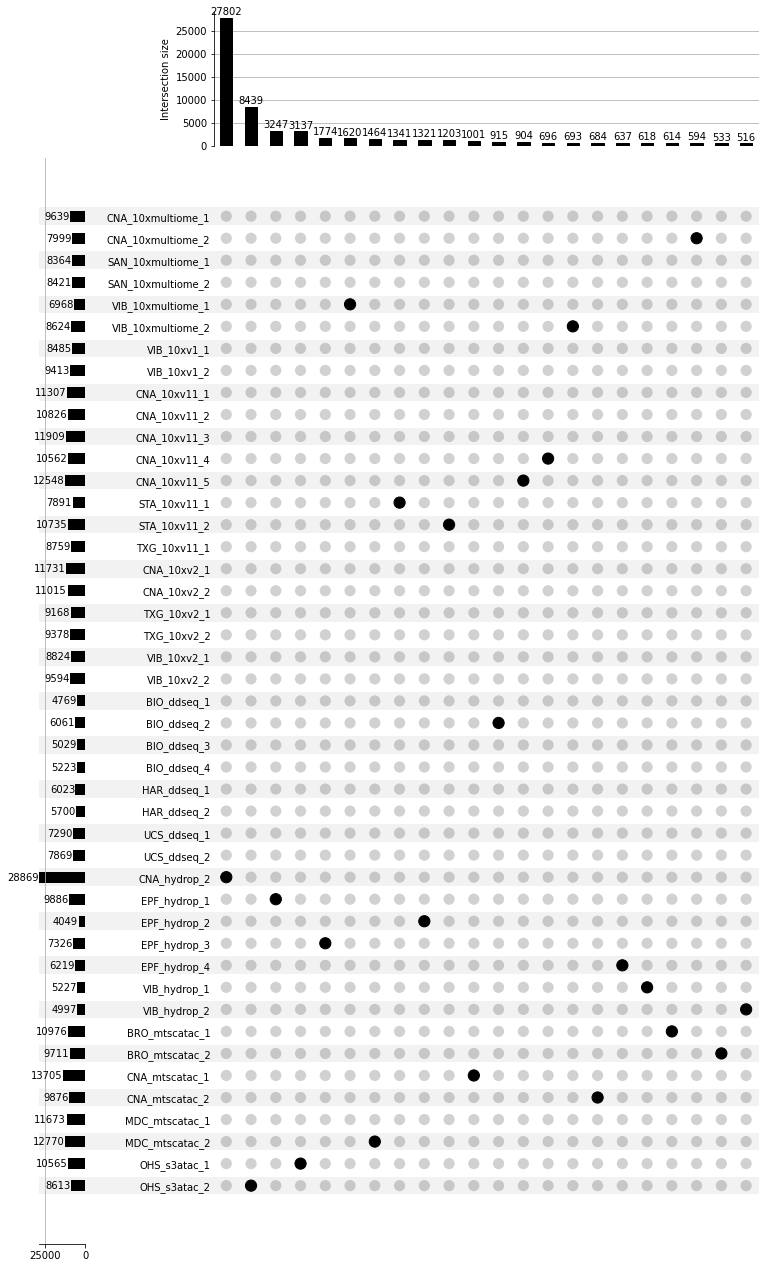

In [201]:
for venn_path in sorted(glob.glob("upset_mergepeaks/*dars*venn.txt")):
    df = pd.read_csv(venn_path, sep="\t")
    names = [
        samples_number_dict_reversed[x.split("_")[-1]] for x in df.columns[:-2]
    ] + list(df.columns[-2:])
    df.columns = names
    df["Name"] = [
        "|".join([samples_number_dict_reversed[y.split("_")[-1]] for y in x.split("|")])
        for x in df["Name"]
    ]
    df_formated = from_memberships(df.Name.str.split("|"), data=df)
    df_order = pd.DataFrame([x.split("_") for x in list(df_formated.index.names)])
    df_order = df_order.sort_values(by=[1, 0, 2])

    list_order = ["_".join(x) for x in df_order.values.tolist()]
    list_order.reverse()

    df_formated = df_formated.reorder_levels(order=list_order)
    upset_obj = UpSet(
        df_formated,
        min_subset_size=500,
        show_counts=True,
        sum_over="Total",
        sort_by="cardinality",
        sort_categories_by=None,
    )
    upset_obj.plot()
    # plt.savefig('plts_pub/upset_libds_consensus_peaks.png', dpi=300, transparent=False, facecolor='white')

KeyError: 'peaks/0'

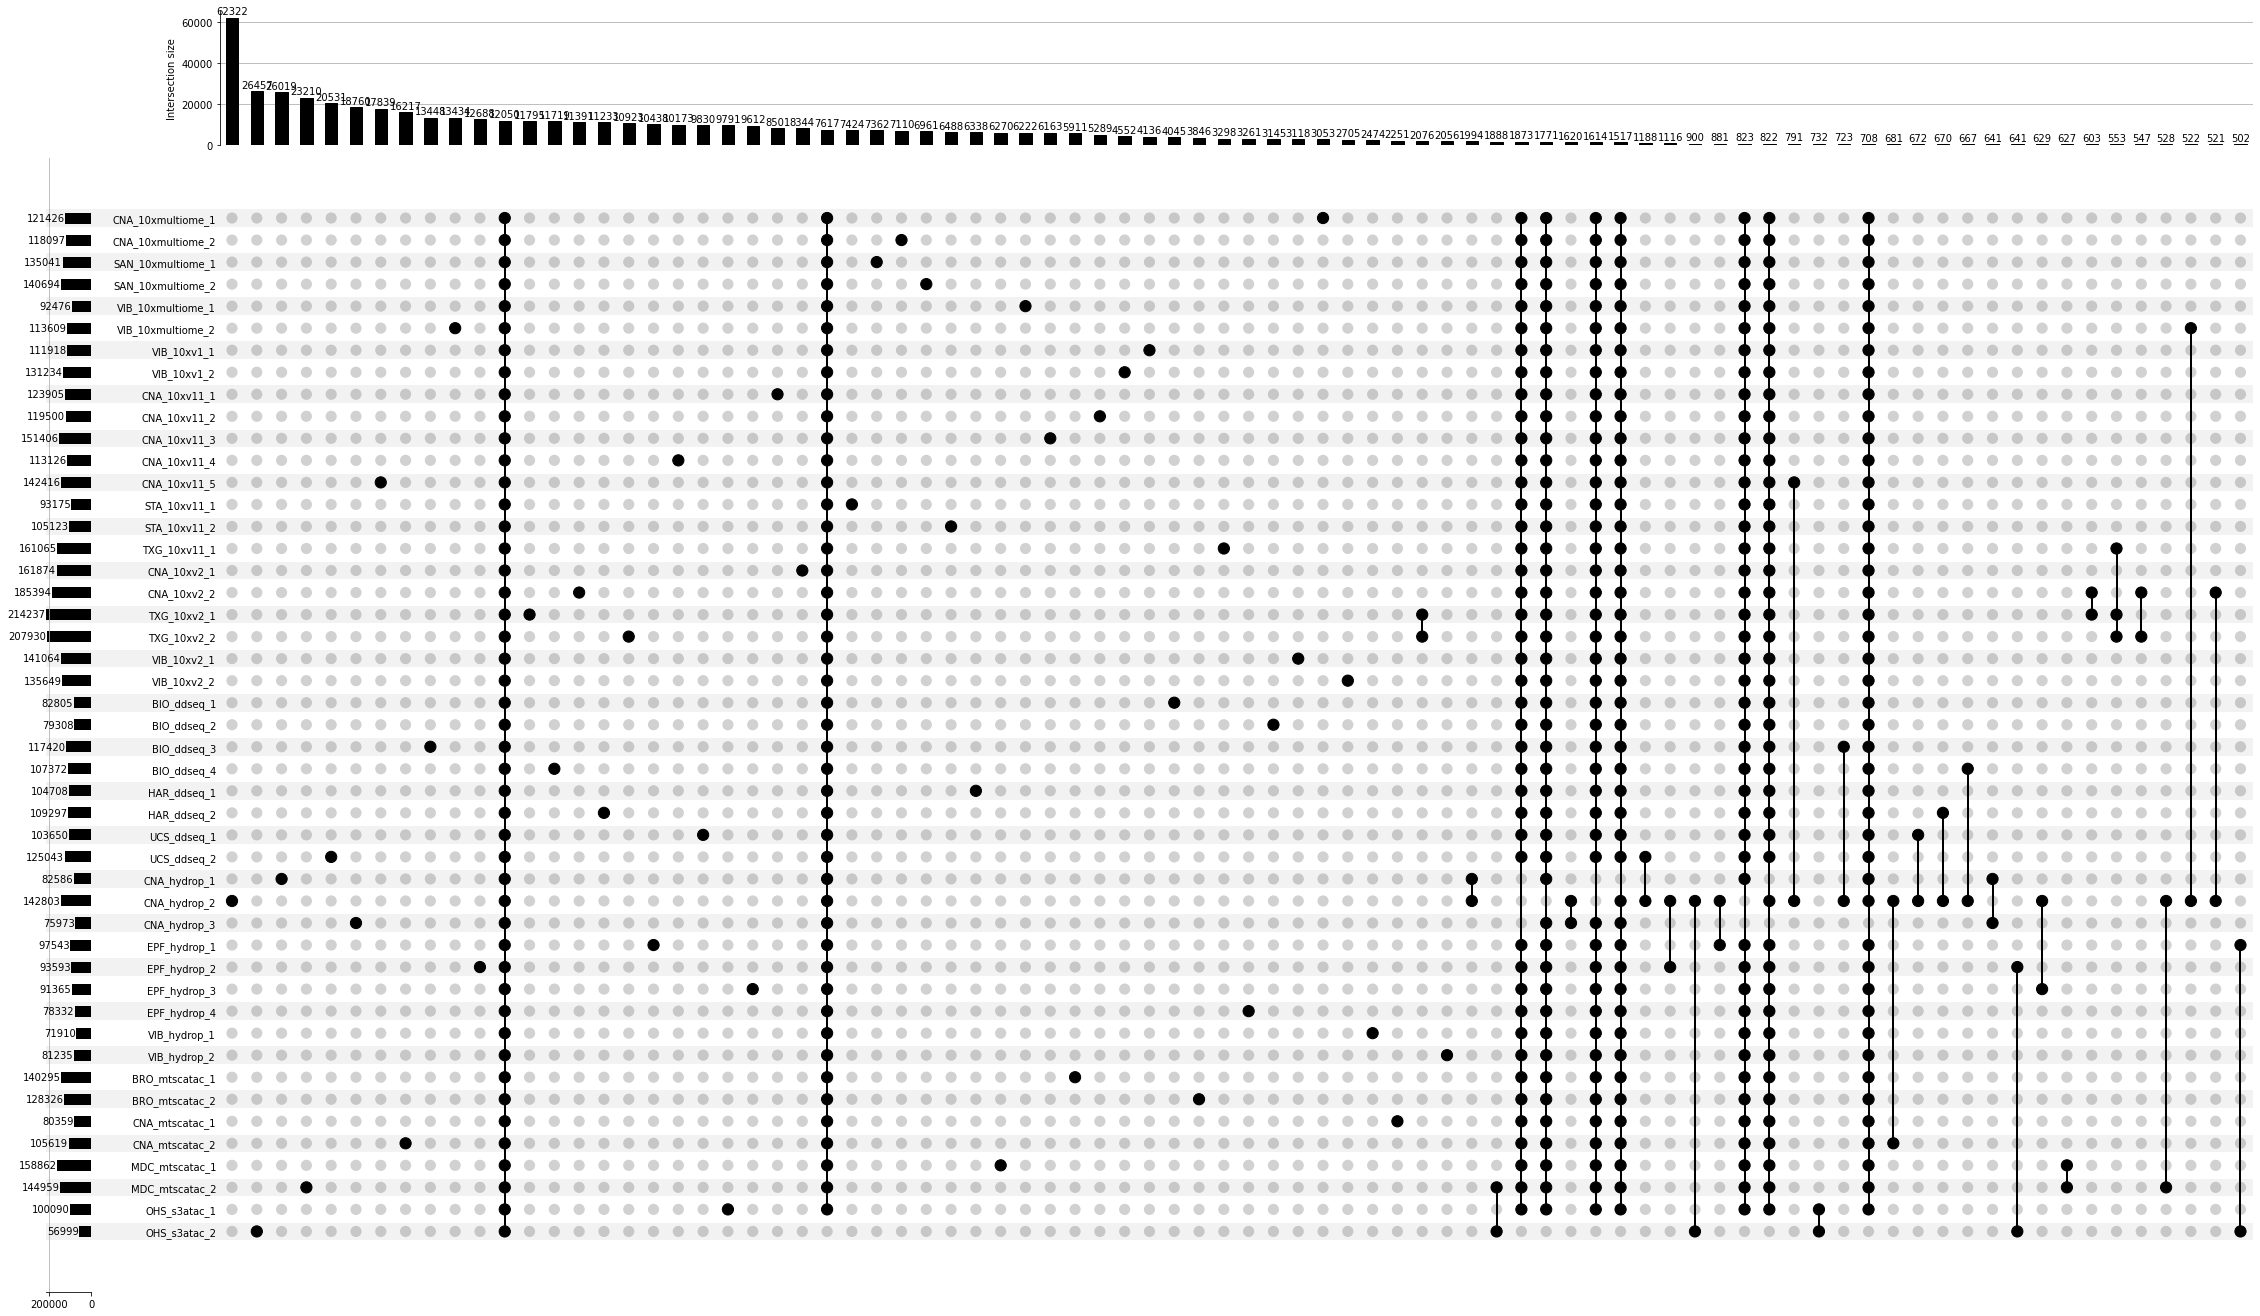

In [312]:
for venn_path in sorted(glob.glob("upset_mergepeaks/*consensus_peaks*venn.txt")):
    df = pd.read_csv(venn_path, sep="\t")
    names = [
        samples_number_dict_reversed[x.split("_")[-1]] for x in df.columns[:-2]
    ] + list(df.columns[-2:])
    df.columns = names
    df["Name"] = [
        "|".join([samples_number_dict_reversed[y.split("_")[-1]] for y in x.split("|")])
        for x in df["Name"]
    ]
    df_formated = from_memberships(df.Name.str.split("|"), data=df)
    df_order = pd.DataFrame([x.split("_") for x in list(df_formated.index.names)])
    df_order = df_order.sort_values(by=[1, 0, 2])

    list_order = ["_".join(x) for x in df_order.values.tolist()]
    list_order.reverse()

    df_formated = df_formated.reorder_levels(order=list_order)
    upset_obj = UpSet(
        df_formated,
        min_subset_size=500,
        show_counts=True,
        sum_over="Total",
        sort_by="cardinality",
        sort_categories_by=None,
    )
    upset_obj.plot()
    # plt.savefig('plts_pub/upset_libds_consensus_peaks.png', dpi=300, transparent=False, facecolor='white')

# Matrix counts 

For DARs

In [280]:
samples_number_dict = {x: samples.index(x) for x in samples}
samples_number_dict_reversed = {
    str(samples_number_dict[x]): str(x) for x in samples_number_dict.keys()
}
samples_number_dict_reversed

{'0': 'BIO_ddseq_1',
 '1': 'BIO_ddseq_2',
 '2': 'BIO_ddseq_3',
 '3': 'BIO_ddseq_4',
 '4': 'BRO_mtscatac_1',
 '5': 'BRO_mtscatac_2',
 '6': 'CNA_10xmultiome_1',
 '7': 'CNA_10xmultiome_2',
 '8': 'CNA_10xv11_1',
 '9': 'CNA_10xv11_2',
 '10': 'CNA_10xv11_3',
 '11': 'CNA_10xv11_4',
 '12': 'CNA_10xv11_5',
 '13': 'CNA_10xv2_1',
 '14': 'CNA_10xv2_2',
 '15': 'CNA_hydrop_1',
 '16': 'CNA_hydrop_2',
 '17': 'CNA_hydrop_3',
 '18': 'CNA_mtscatac_1',
 '19': 'CNA_mtscatac_2',
 '20': 'EPF_hydrop_1',
 '21': 'EPF_hydrop_2',
 '22': 'EPF_hydrop_3',
 '23': 'EPF_hydrop_4',
 '24': 'HAR_ddseq_1',
 '25': 'HAR_ddseq_2',
 '26': 'MDC_mtscatac_1',
 '27': 'MDC_mtscatac_2',
 '28': 'OHS_s3atac_1',
 '29': 'OHS_s3atac_2',
 '30': 'SAN_10xmultiome_1',
 '31': 'SAN_10xmultiome_2',
 '32': 'STA_10xv11_1',
 '33': 'STA_10xv11_2',
 '34': 'TXG_10xv11_1',
 '35': 'TXG_10xv2_1',
 '36': 'TXG_10xv2_2',
 '37': 'UCS_ddseq_1',
 '38': 'UCS_ddseq_2',
 '39': 'VIB_10xmultiome_1',
 '40': 'VIB_10xmultiome_2',
 '41': 'VIB_10xv1_1',
 '42': 'VIB_10x

In [281]:
cell_types_numbers_dict = {
    "Dendritic_cell": "a",
    "Cytotoxic_T_cell": "b",
    "Natural_killer_cell": "c",
    "DARs_dict.pkl": "d",
    "CD14+_monocyte": "e",
    "CD16+_monocyte": "f",
    "B_cell": "g",
    "CD4+_T_cell": "h",
}
cell_types_numbers_dict_reversed = {
    str(cell_types_numbers_dict[x]): str(x) for x in cell_types_numbers_dict.keys()
}

In [282]:
bed_length_dict = {}
for path in sorted(glob.glob("upset_mergepeaks/DARs/*")):
    # print(path)
    df_bed = pd.read_csv(path, sep="\t", header=None)
    bed_length_dict[path.split("/")[-1]] = len(df_bed)

Dendritic_cell
Cytotoxic_T_cell
Natural_killer_cell
CD14+_monocyte
CD16+_monocyte
B_cell
CD4+_T_cell


KeyError: 'homer_mergepeaks.parallel'

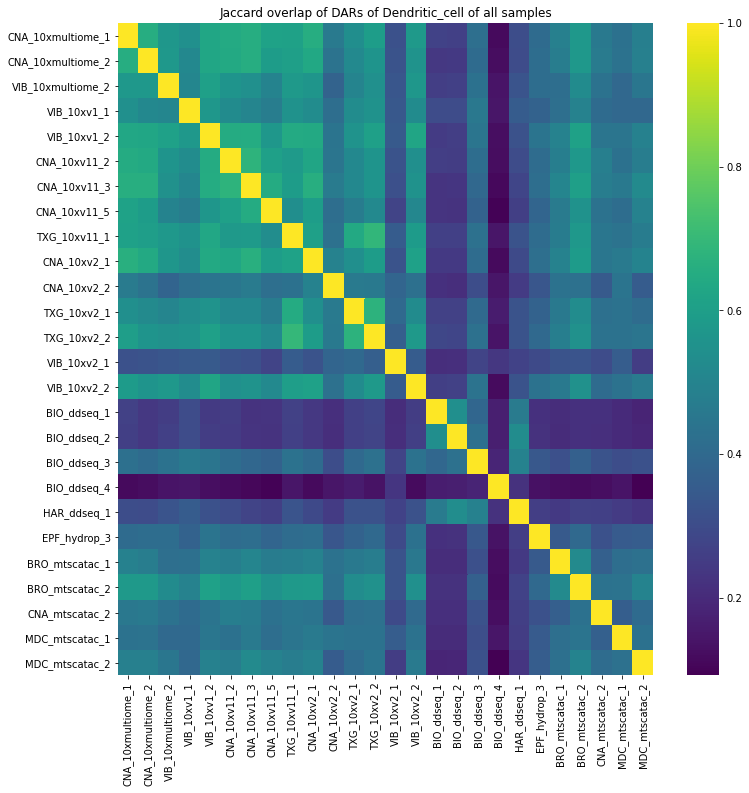

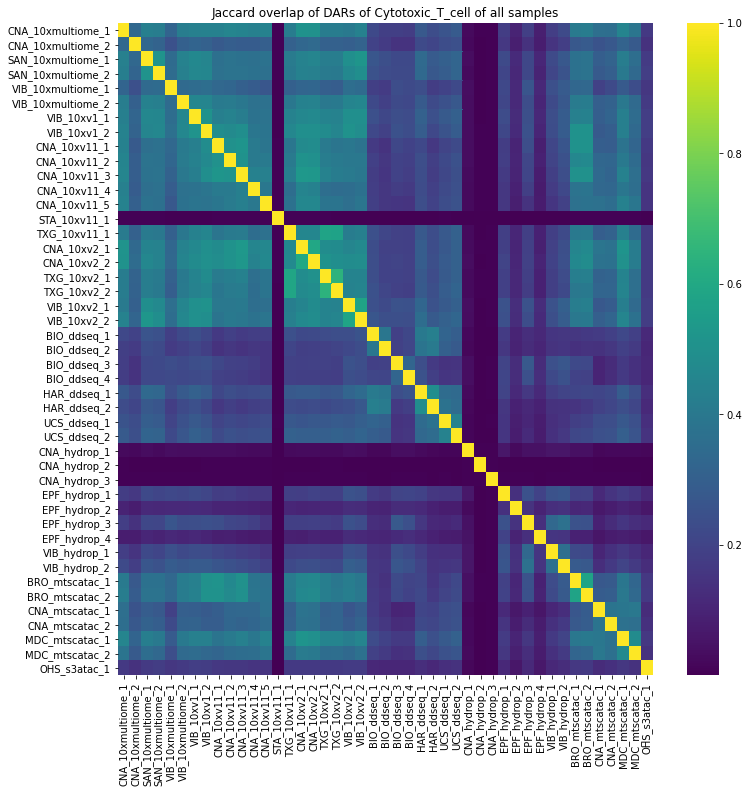

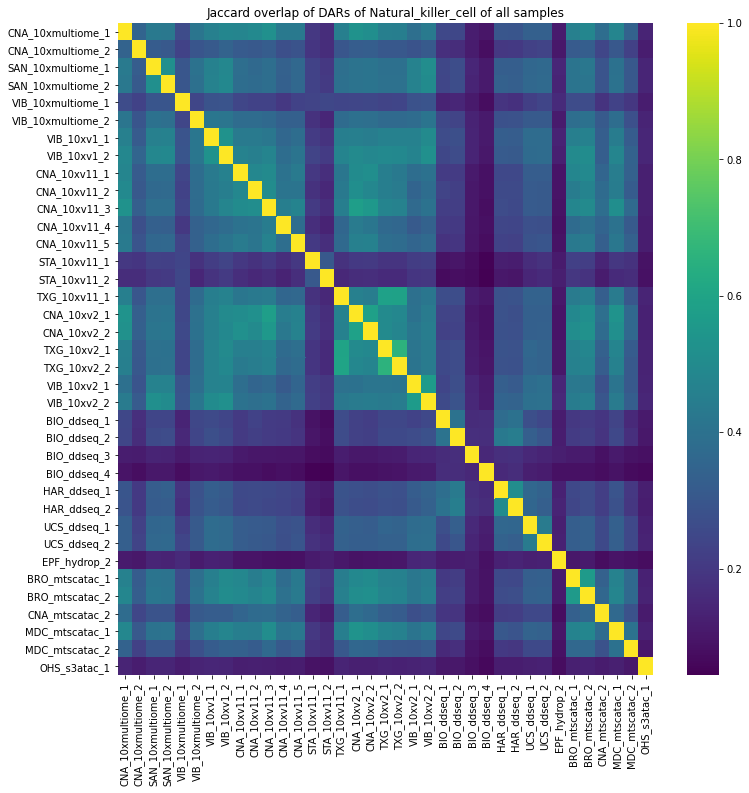

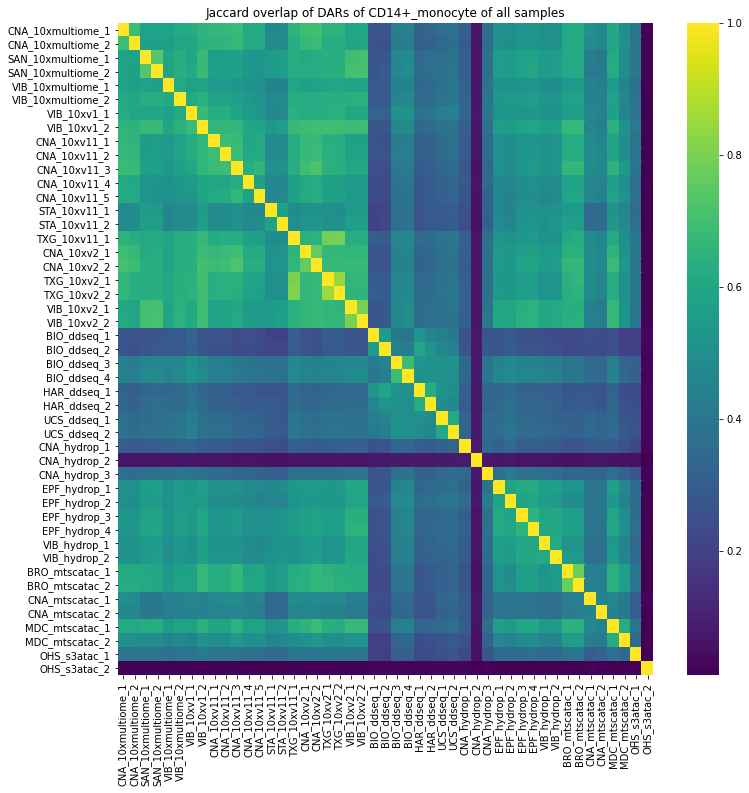

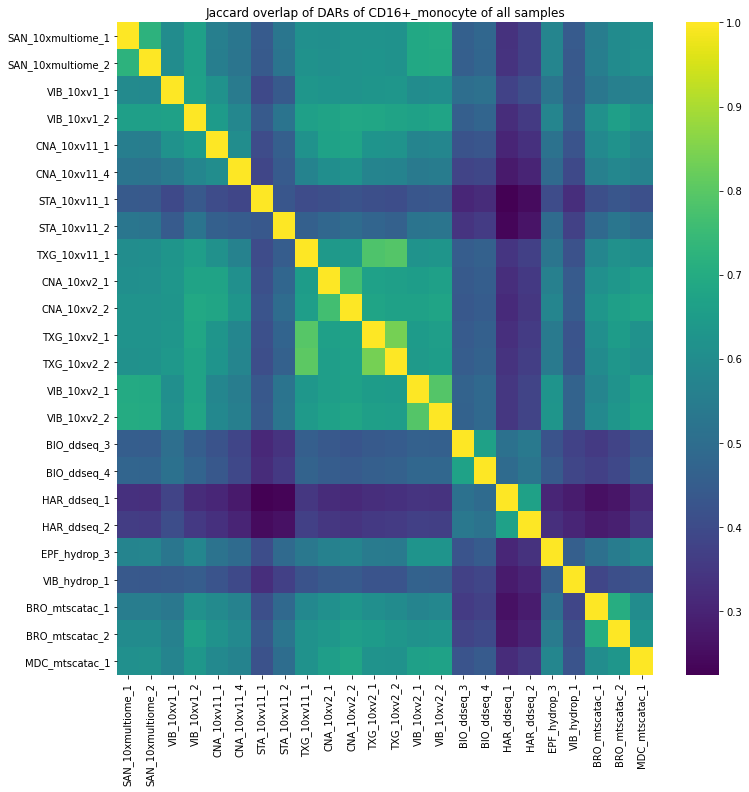

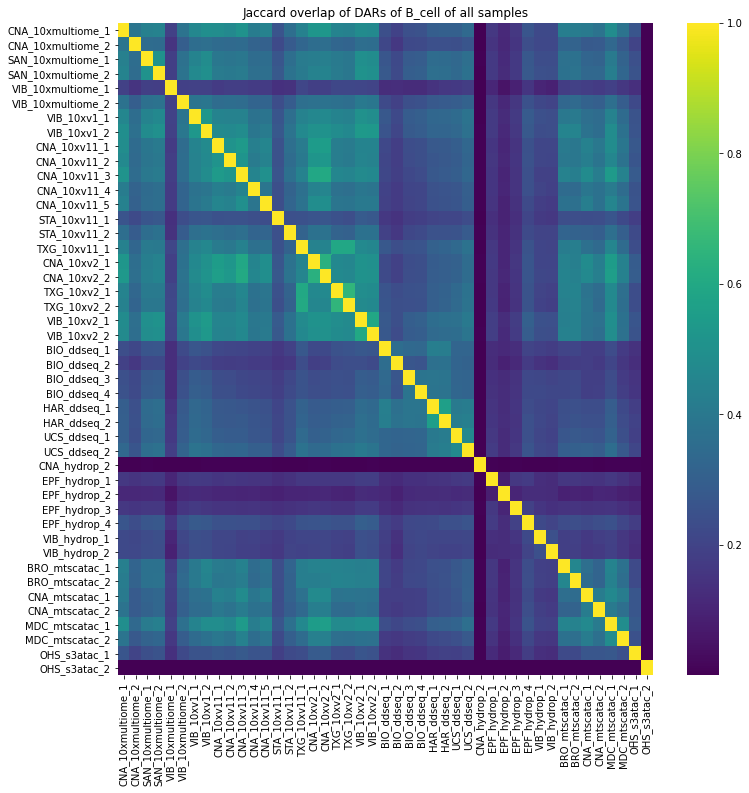

In [283]:
for path in sorted(glob.glob("upset_mergepeaks/*_dars*count.matrix.txt")):
    cell_type = cell_types_numbers_dict_reversed[path.split("/")[-1].split("_")[0]]
    print(cell_type)
    df = pd.read_csv(
        path,
        sep="\t",
        header=0,
        index_col=0,
    )
    df_normalized = pd.DataFrame()
    for idx in df.index:
        for col in df.columns:
            df_normalized.at[idx, col] = df.at[idx, col] / (
                bed_length_dict[idx] + bed_length_dict[col] - df.at[idx, col]
            )

    df_normalized.index = [
        samples_number_dict_reversed[x.split("_")[-1]] for x in df_normalized.index
    ]
    df_normalized.columns = [
        samples_number_dict_reversed[x.split("_")[-1]] for x in df_normalized.columns
    ]
    df_order = pd.DataFrame([x.split("_") for x in list(df_normalized.index)])
    df_order = df_order.sort_values(by=[1, 0, 2])

    list_order = ["_".join(x) for x in df_order.values.tolist()]
    # list_order.reverse()
    df_normalized = df_normalized[list_order]
    df_normalized = df_normalized.loc[list_order]
    fix, ax = plt.subplots(figsize=(12, 12))
    
    plt.title(f'Jaccard overlap of DARs of {cell_type} of all samples')
    sns.heatmap(df_normalized, ax=ax, cmap="viridis")
    plt.savefig(f"plts_upset/dars_jaccard_{cell_type}.png", dpi=600, facecolor="white")

In [276]:
cell_types_numbers_dict = {
    "CD16_monocyte": "i",
    "CD4_Tcell": "j",
    "CD14_monocyte": "k",
    "Naturalkillercell": "l",
    "Dendriticcell": "m",
    "CytotoxicTcell": "n",
    "Bcell": "o",
}
cell_types_numbers_dict_reversed = {
    str(cell_types_numbers_dict[x]): str(x) for x in cell_types_numbers_dict.keys()
}

bed_length_dict = {}
for path in sorted(glob.glob("upset_mergepeaks/peaks/*")):
    # print(path)
    df_bed = pd.read_csv(path, sep="\t", header=None)
    bed_length_dict[path.split("/")[-1]] = len(df_bed)

In [277]:
bed_length_dict

{'i_11': 25111,
 'i_13': 90341,
 'i_14': 102360,
 'i_2': 52855,
 'i_22': 48991,
 'i_24': 62811,
 'i_25': 33313,
 'i_26': 47819,
 'i_3': 48731,
 'i_30': 107890,
 'i_31': 51909,
 'i_32': 43627,
 'i_33': 42080,
 'i_34': 103558,
 'i_35': 131781,
 'i_36': 120388,
 'i_4': 82629,
 'i_41': 65983,
 'i_42': 68697,
 'i_43': 110551,
 'i_44': 103728,
 'i_45': 25613,
 'i_5': 75278,
 'i_8': 47002,
 'j_0': 74153,
 'j_1': 84139,
 'j_10': 114745,
 'j_11': 75289,
 'j_12': 85146,
 'j_13': 145278,
 'j_14': 167125,
 'j_15': 32103,
 'j_16': 57354,
 'j_17': 35369,
 'j_18': 62436,
 'j_19': 49444,
 'j_2': 68448,
 'j_20': 38747,
 'j_21': 48357,
 'j_22': 47597,
 'j_23': 46726,
 'j_24': 94587,
 'j_25': 95702,
 'j_26': 132854,
 'j_27': 96711,
 'j_28': 65827,
 'j_29': 19547,
 'j_3': 69504,
 'j_30': 128914,
 'j_31': 149253,
 'j_32': 75838,
 'j_33': 58100,
 'j_34': 136950,
 'j_35': 245358,
 'j_36': 232601,
 'j_37': 110655,
 'j_38': 104362,
 'j_39': 58099,
 'j_4': 86972,
 'j_40': 54875,
 'j_41': 82545,
 'j_42': 116265,

CD16_monocyte
CD4_Tcell
CD14_monocyte
Naturalkillercell
Dendriticcell
CytotoxicTcell
Bcell


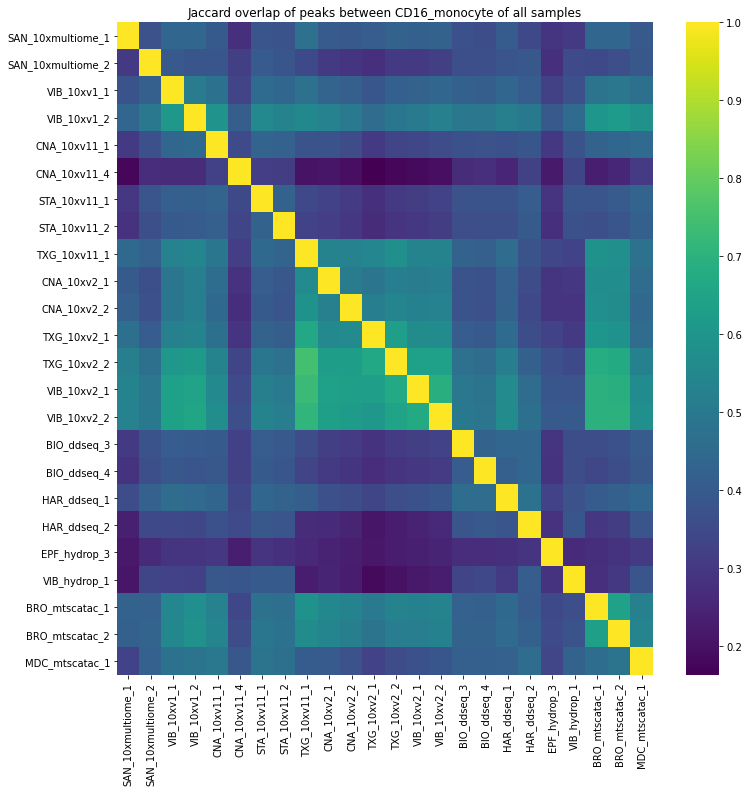

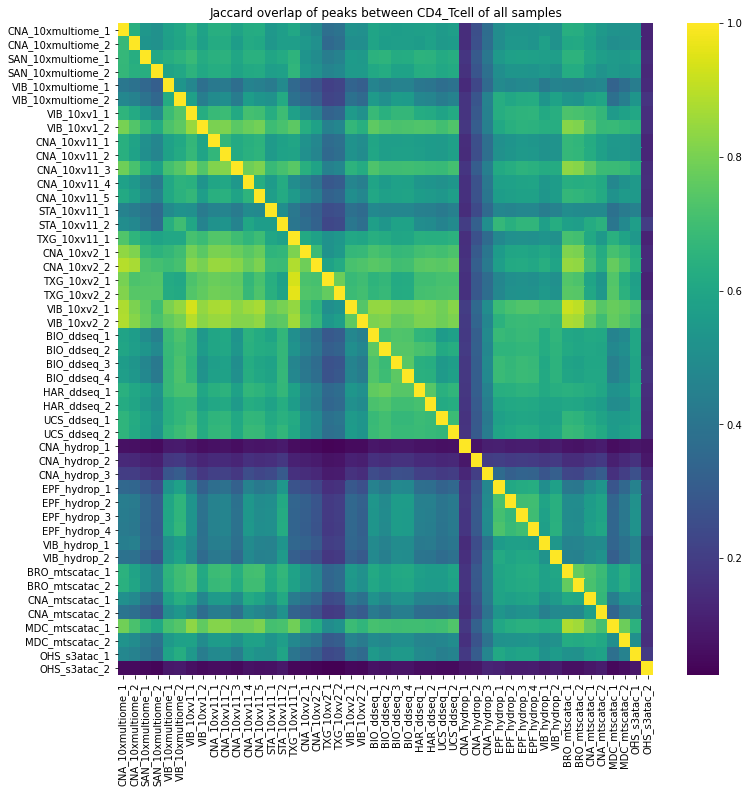

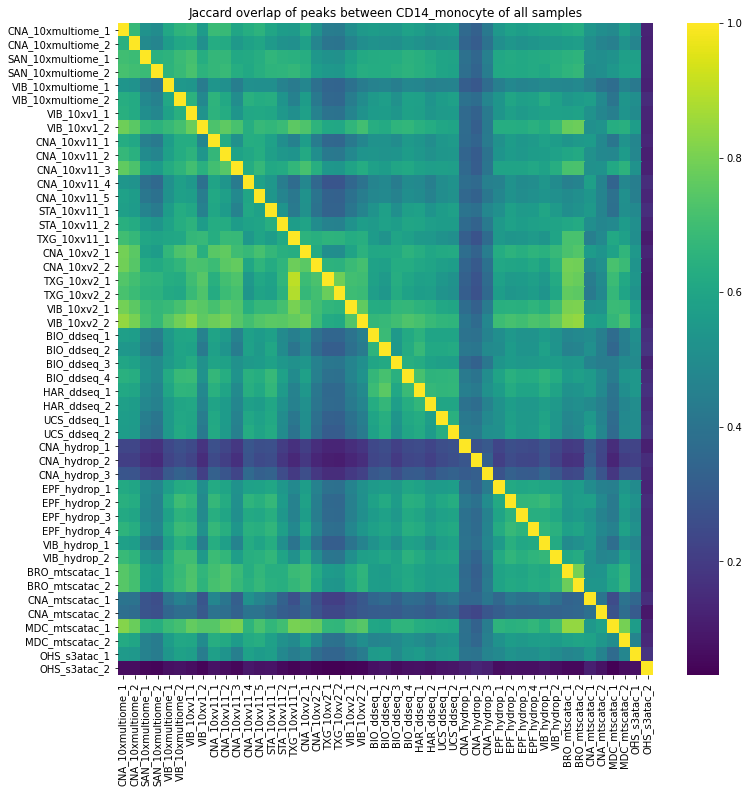

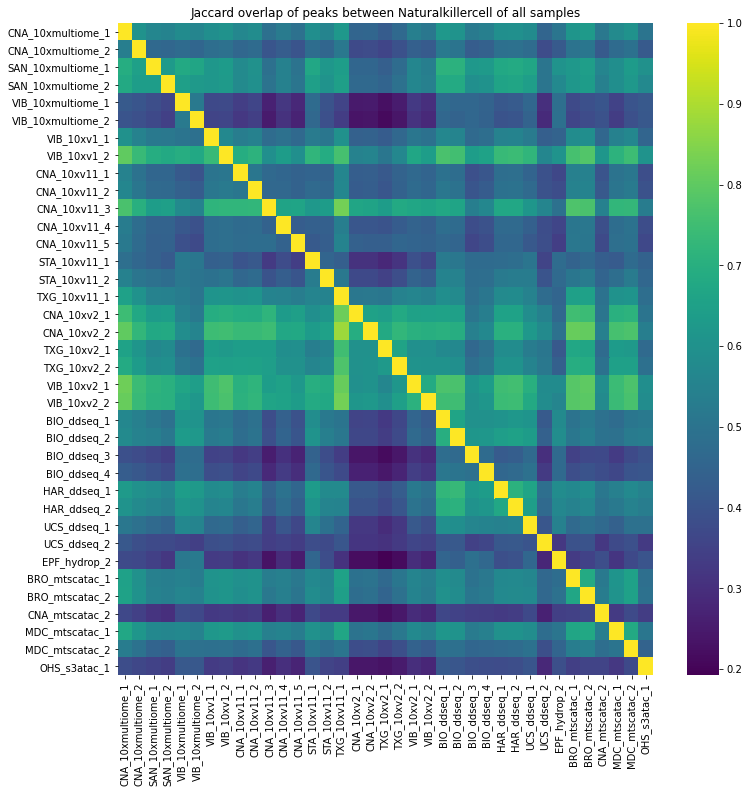

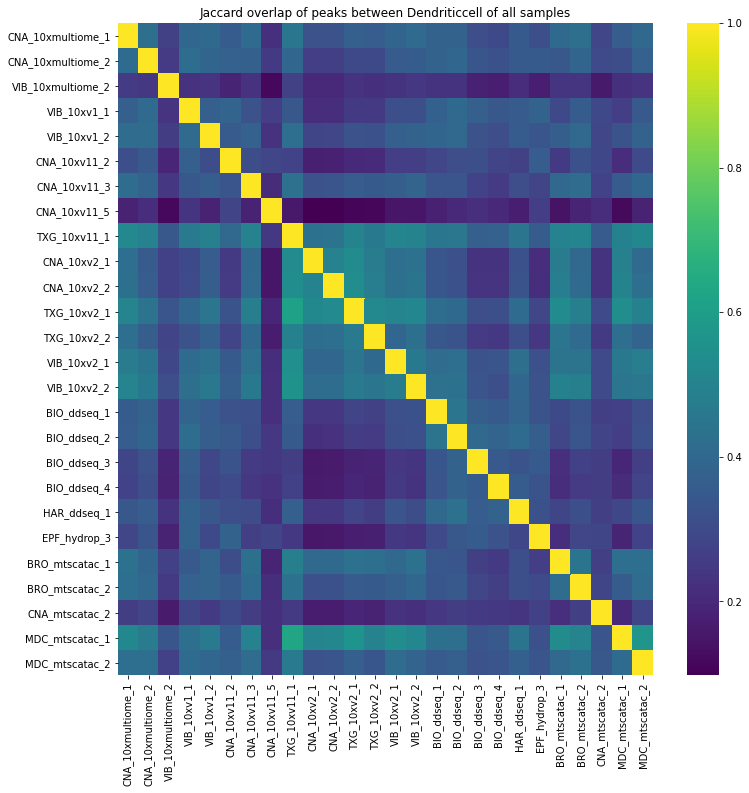

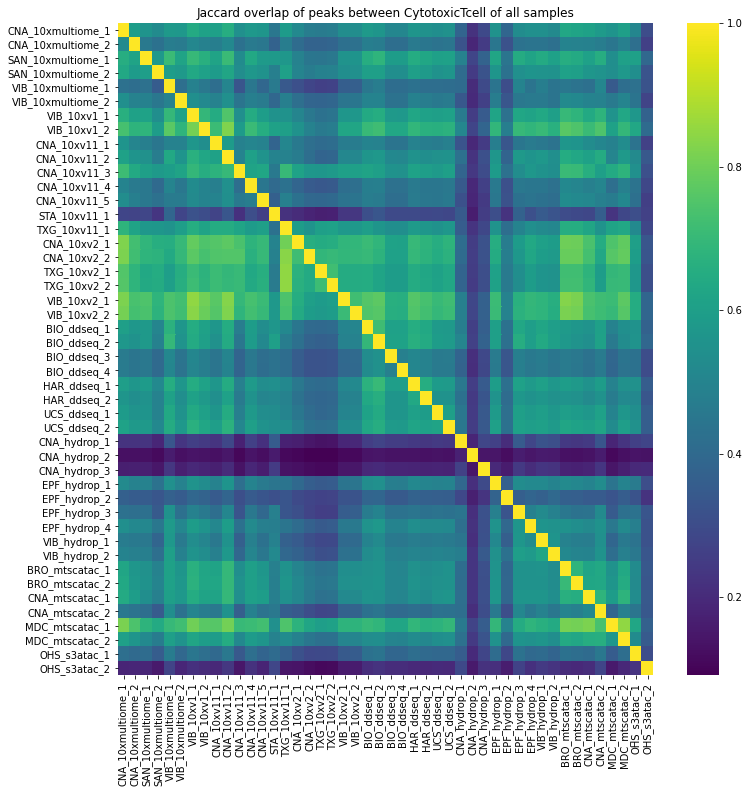

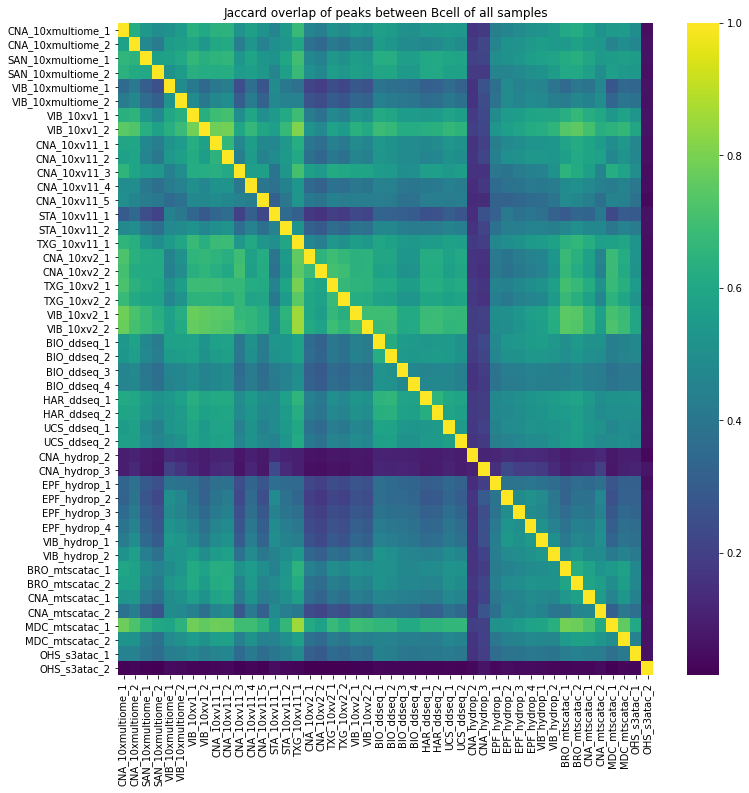

In [279]:
for path in sorted(glob.glob("upset_mergepeaks/*_peaks*count.matrix.txt")):
    cell_type = cell_types_numbers_dict_reversed[path.split("/")[-1].split("_")[0]]
    print(cell_type)
    df = pd.read_csv(
        path,
        sep="\t",
        header=0,
        index_col=0,
    )
    df_normalized = pd.DataFrame()
    for idx in df.index:
        for col in df.columns:
            df_normalized.at[idx, col] = df.at[idx, col] / (
                bed_length_dict[idx] + bed_length_dict[col] - df.at[idx, col]
            )

    df_normalized.index = [
        samples_number_dict_reversed[x.split("_")[-1]] for x in df_normalized.index
    ]
    df_normalized.columns = [
        samples_number_dict_reversed[x.split("_")[-1]] for x in df_normalized.columns
    ]
    df_order = pd.DataFrame([x.split("_") for x in list(df_normalized.index)])
    df_order = df_order.sort_values(by=[1, 0, 2])

    list_order = ["_".join(x) for x in df_order.values.tolist()]
    # list_order.reverse()
    df_normalized = df_normalized[list_order]
    df_normalized = df_normalized.loc[list_order]
    fix, ax = plt.subplots(figsize=(12, 12))

    plt.title(f"Jaccard overlap of peaks between {cell_type} of all samples")
    sns.heatmap(df_normalized, ax=ax, cmap="viridis")
    plt.savefig(f"plts_upset/peaks_jaccard_{cell_type}.png", dpi=600, facecolor="white")

In [319]:
bed_length_dict = {}
for path in sorted(glob.glob("upset_mergepeaks/consensus_peaks/*")):
    # print(path)
    df_bed = pd.read_csv(path, sep="\t", header=None)
    bed_length_dict[path.split("/")[-1]] = len(df_bed)

bed_length_dict

{'0': 128324,
 '1': 126874,
 '10': 224799,
 '11': 160328,
 '12': 200897,
 '13': 243835,
 '14': 278326,
 '15': 92001,
 '16': 154618,
 '17': 88138,
 '18': 108390,
 '19': 133318,
 '2': 168097,
 '20': 133610,
 '21': 123315,
 '22': 123431,
 '23': 108999,
 '24': 164195,
 '25': 165213,
 '26': 234969,
 '27': 192274,
 '28': 153288,
 '29': 61107,
 '3': 154559,
 '30': 225208,
 '31': 236948,
 '32': 134559,
 '33': 154591,
 '34': 249709,
 '35': 344939,
 '36': 334496,
 '37': 153113,
 '38': 177414,
 '39': 130946,
 '4': 203020,
 '40': 159421,
 '41': 163019,
 '42': 198099,
 '43': 222650,
 '44': 216218,
 '45': 95894,
 '46': 109553,
 '5': 186010,
 '6': 181748,
 '7': 172891,
 '8': 175126,
 '9': 167458}

In [330]:
bed_length_dict

{'0': 128324,
 '1': 126874,
 '10': 224799,
 '11': 160328,
 '12': 200897,
 '13': 243835,
 '14': 278326,
 '15': 92001,
 '16': 154618,
 '17': 88138,
 '18': 108390,
 '19': 133318,
 '2': 168097,
 '20': 133610,
 '21': 123315,
 '22': 123431,
 '23': 108999,
 '24': 164195,
 '25': 165213,
 '26': 234969,
 '27': 192274,
 '28': 153288,
 '29': 61107,
 '3': 154559,
 '30': 225208,
 '31': 236948,
 '32': 134559,
 '33': 154591,
 '34': 249709,
 '35': 344939,
 '36': 334496,
 '37': 153113,
 '38': 177414,
 '39': 130946,
 '4': 203020,
 '40': 159421,
 '41': 163019,
 '42': 198099,
 '43': 222650,
 '44': 216218,
 '45': 95894,
 '46': 109553,
 '5': 186010,
 '6': 181748,
 '7': 172891,
 '8': 175126,
 '9': 167458}

In [386]:
for path in sorted(glob.glob("upset_mergepeaks/*consensus_peaks*count.matrix.txt")):
    df = pd.read_csv(
        path,
        sep="\t",
        header=0,
        index_col=0,
    )
    # df.index = [x.split('/')[-1] for x in df.index]
    # df.columns = [x.split('/')[-1] for x in df.columns]
    df.index = [str(x) for x in df.index]
    df.columns = [str(x) for x in df.columns]

In [387]:
df

0       1      10      11      12      13      14     15      16  \
0   128324   90278  100866   84346   90898  101984  104879  38218   39310   
1    90324  126874   99159   83530   89856  100626  103665  37933   38604   
10  103668  102188  224799  124222  141391  174962  184793  45830   47055   
11   84485   83670  122211  160328  110714  123561  126941  40849   41177   
12   91645   90674  139894  111322  200897  141618  146768  42879   43995   
13  106495  105320  176206  126865  144223  243835  195230  46429   47870   
14  110521  109397  186957  131084  150358  196264  278326  47793   49791   
15   36811   36442   43320   39366   41256   43404   44433  92001   31809   
16   38036   37290   44896   39956   42678   45181   46813  31972  154618   
17   42568   42403   50510   46000   47792   50702   51700  32608   33457   
18   67630   67372   99330   86682   92267   99626  101178  37179   36652   
19   66167   65643   97478   83317   89106   98088  100800  37994   37867   
2    92066   93495  114060   92350  100720  116317  120911  41831   42892   
20   76595   76471   99080   83586   89421  100634  103352  41305   41244   
21   70032   70030   89050   77048   81545   90259   92296  40518   40305   
22   71857   71904   93452   79476   84570   95169   97695  40339   39873   
23   72207   72382   94120   80941   85543   95685   97735  39930   38849   
24   99253  102880  118592   95765  105056  121122  125506  41326   42938   
25   96915  101237  115326   93946  102886  117420  121693  41076   42779   
26  101885  101814  172040  123366  140367  178494  192482  46203   46554   
27   79988   80525  132926  103535  114964  134884  141679  42170   41718   
28   80973   80754  105309   89618   96678  107796  110998  39714   40560   
29   17891   17808   19066   18640   19268   18805   18952  15899   16894   
3    89732   91377  109380   90298   97711  111312  115292  41194   41823   
30  105753  107362  147673  115196  128209  152367  160309  44926   46717   
31  108420  109808  153275  118320  132672  158163  166381  45494   47863   
32   77190   79292  103810   87700   94106  105676  108897  39872   39215   
33   84533   86932  118452   96247  104553  120992  125870  41315   40884   
34  108583  106963  173131  124245  142481  178138  191818  45003   47197   
35  119607  118542  196658  137795  160509  206129  226058  48946   52940   
36  118994  117711  195181  136631  158851  204256  223796  48663   52524   
37   88783   92357  113319   94256  102382  114965  118141  40682   41724   
38   89205   93297  117560   97612  106391  119315  123011  41312   43174   
39   76380   76142  101890   86230   92515  103915  106890  39059   38349   
4    94714   94433  156354  116253  130340  160785  170743  43823   43623   
40   83214   82942  114346   95060  102688  116944  120411  40928   41009   
41   92736   92664  133537  107013  117382  135757  140434  42229   42240   
42  102682  101936  154676  116686  130315  158368  166615  44700   45197   
43  106027  107118  165620  122284  137329  172731  184449  45848   46212   
44  105603  106934  164785  122425  137512  171358  181802  45516   45847   
45   65780   66280   84776   74170   77829   86098   87671  38135   36962   
46   71886   72206   95987   80815   85901   97824  100490  39650   38387   
5    92043   91778  149944  113291  126454  153187  161782  43099   42543   
6    97528   95703  146873  113616  126443  149441  155378  42888   43231   
7    93097   91003  133702  107249  117659  135931  140590  42258   42610   
8    91312   89722  137499  109345  121048  138878  143277  42312   42861   
9    91123   89331  138586  108935  120358  140070  144707  42375   42445   

       17  ...      42      43      44     45      46       5       6       7  \
0   43958  ...  100523  101809  101459  66590   72395   90901   96704   92713   
1   43876  ...   99754  102804  102732  67076   72718   90698   94854   90627   
10  53022  ...  155183  164343  163569  86722   97681  151197  148694

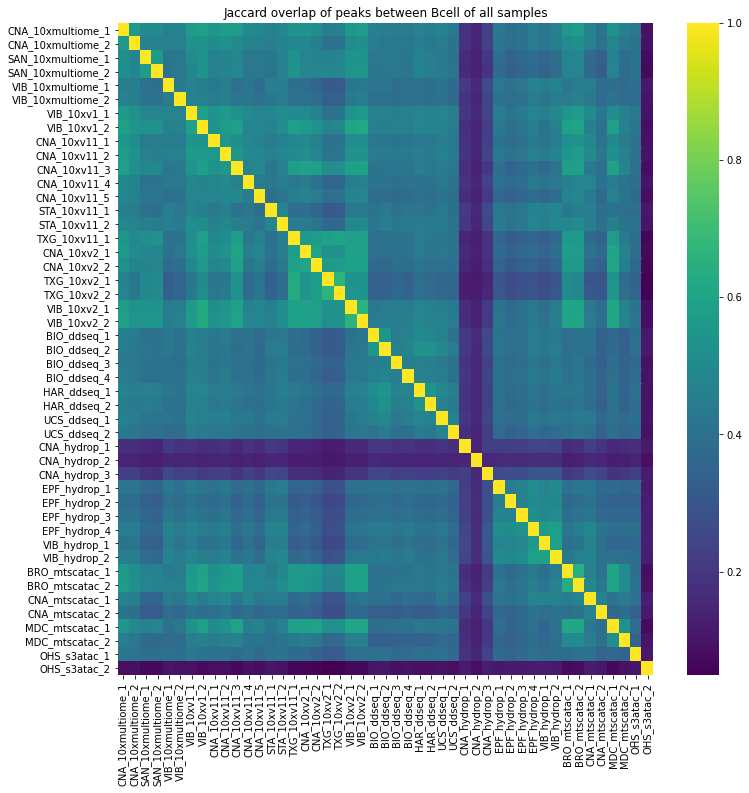

In [388]:
for path in sorted(glob.glob("upset_mergepeaks/*consensus_peaks*count.matrix.txt")):
    df = pd.read_csv(
        path,
        sep="\t",
        header=0,
        index_col=0,
    )
    # df.index = [x.split('/')[-1] for x in df.index]
    # df.columns = [x.split('/')[-1] for x in df.columns]
    df.index = [str(x) for x in df.index]
    df.columns = [str(x) for x in df.columns]

    df_normalized = pd.DataFrame()
    for idx in df.index:
        for col in df.columns:
            df_normalized.at[idx, col] = df.at[idx, col] / (
                bed_length_dict[str(idx)] + bed_length_dict[col] - df.at[str(idx), col]
            )

    df_normalized.index = [
        samples_number_dict_reversed[x.split("_")[-1]] for x in df_normalized.index
    ]
    df_normalized.columns = [
        samples_number_dict_reversed[x.split("_")[-1]] for x in df_normalized.columns
    ]
    df_order = pd.DataFrame([x.split("_") for x in list(df_normalized.index)])
    df_order = df_order.sort_values(by=[1, 0, 2])

    list_order = ["_".join(x) for x in df_order.values.tolist()]
    # list_order.reverse()
    df_normalized = df_normalized[list_order]
    df_normalized = df_normalized.loc[list_order]
    fix, ax = plt.subplots(figsize=(12, 12))

    plt.title(f"Jaccard overlap of peaks between {cell_type} of all samples")
    sns.heatmap(df_normalized, ax=ax, cmap="viridis")
    # plt.savefig(f"plts_upset/peaks_jaccard_{cell_type}.png", dpi=600, facecolor="white")

# Log ratio matrices

In [74]:
for path in sorted(glob.glob('upset_mergepeaks/*logRatio.matrix.txt')):
    df = pd.read_csv(path, sep='\t')

EmptyDataError: No columns to parse from file

In [107]:
df = pd.read_csv(
    "/lustre1/project/stg_00090/scatac_benchmark/fixedcells_3_cistopic_consensus/upset_mergepeaks/Bcell_peaks_matrix.txt.logRatio.matrix.txt",
    sep="\t",
    skiprows=[0],
    header=None,
    index_col=0,
)
df.index = [x.split("/")[-2].split(".")[0] for x in df.index]
df.columns = df.index

In [102]:
df.index = [x.split("/")[-2].split(".")[0] for x in df.index]
df.columns = df.index

In [116]:
list(df.index)

['BIO_ddseq_1',
 'BIO_ddseq_2',
 'BIO_ddseq_3',
 'BIO_ddseq_4',
 'BRO_mtscatac_1',
 'BRO_mtscatac_2',
 'CNA_10xmultiome_1',
 'CNA_10xmultiome_2',
 'CNA_10xv11_1',
 'CNA_10xv11_2',
 'CNA_10xv11_3',
 'CNA_10xv11_4',
 'CNA_10xv11_5',
 'CNA_10xv2_1',
 'CNA_10xv2_2',
 'CNA_hydrop_2',
 'CNA_hydrop_3',
 'CNA_mtscatac_1',
 'CNA_mtscatac_2',
 'EPF_hydrop_1',
 'EPF_hydrop_2',
 'EPF_hydrop_3',
 'EPF_hydrop_4',
 'HAR_ddseq_1',
 'HAR_ddseq_2',
 'MDC_mtscatac_1',
 'MDC_mtscatac_2',
 'OHS_s3atac_1',
 'OHS_s3atac_2',
 'SAN_10xmultiome_1',
 'SAN_10xmultiome_2',
 'STA_10xv11_1',
 'STA_10xv11_2',
 'TXG_10xv11_1',
 'TXG_10xv2_1',
 'TXG_10xv2_2',
 'UCS_ddseq_1',
 'UCS_ddseq_2',
 'VIB_10xmultiome_1',
 'VIB_10xmultiome_2',
 'VIB_10xv1_1',
 'VIB_10xv1_2',
 'VIB_10xv2_1',
 'VIB_10xv2_2',
 'VIB_hydrop_1',
 'VIB_hydrop_2']

In [122]:
tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

sample_order = [
    "VIB_10xv1_1",
    "VIB_10xv1_2",
    "CNA_10xv11_1",
    "CNA_10xv11_2",
    "CNA_10xv11_3",
    "CNA_10xv11_4",
    "CNA_10xv11_5",
    "STA_10xv11_1",
    "STA_10xv11_2",
    "TXG_10xv11_1",
    "CNA_10xv2_1",
    "CNA_10xv2_2",
    "VIB_10xv2_1",
    "VIB_10xv2_2",
    "TXG_10xv2_1",
    "TXG_10xv2_2",
    "MDC_mtscatac_1",
    "MDC_mtscatac_2",
    "BRO_mtscatac_1",
    "BRO_mtscatac_2",
    "CNA_mtscatac_1",
    "CNA_mtscatac_2",
    "SAN_10xmultiome_1",
    "SAN_10xmultiome_2",
    "CNA_10xmultiome_1",
    "CNA_10xmultiome_2",
    "VIB_10xmultiome_1",
    "VIB_10xmultiome_2",
    "BIO_ddseq_1",
    "BIO_ddseq_2",
    "BIO_ddseq_3",
    "BIO_ddseq_4",
    "UCS_ddseq_1",
    "UCS_ddseq_2",
    "HAR_ddseq_1",
    "HAR_ddseq_2",
    "EPF_hydrop_1",
    "EPF_hydrop_2",
    "EPF_hydrop_3",
    "EPF_hydrop_4",
    "OHS_s3atac_1",
    "OHS_s3atac_2",
    "CNA_hydrop_2",
    "CNA_hydrop_3",
    "VIB_hydrop_1",
    "VIB_hydrop_2",
]

In [126]:
df_reordered = df[sample_order]
df_reordered = df_reordered.reindex(sample_order)

<AxesSubplot:>

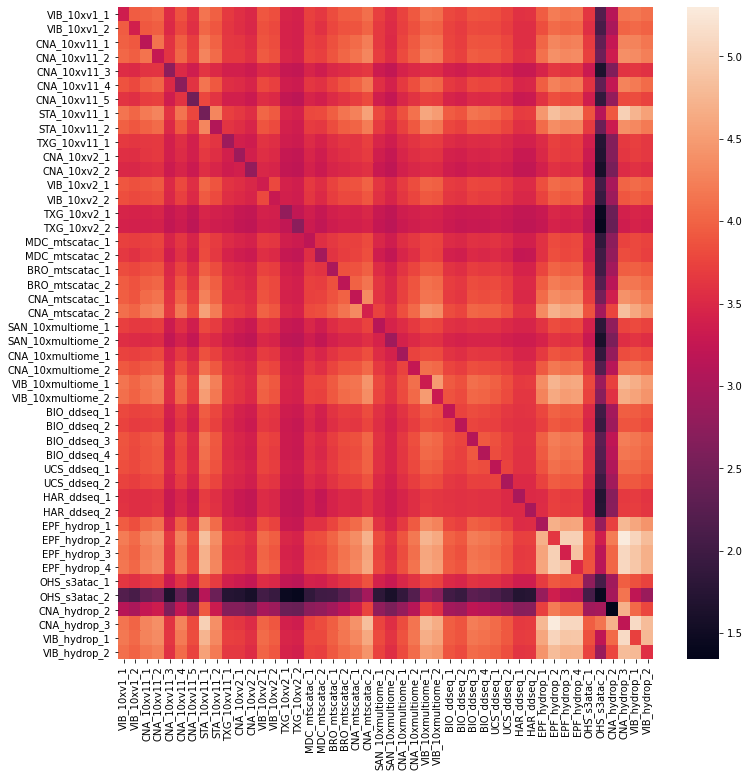

In [127]:
fix, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_reordered, ax=ax)

In [112]:
df

BIO_ddseq_1  BIO_ddseq_2  BIO_ddseq_3  BIO_ddseq_4  \
BIO_ddseq_1           3.225939     3.753737     3.816665     3.790799   
BIO_ddseq_2           3.753737     3.151347     3.757179     3.734810   
BIO_ddseq_3           3.816665     3.757179     3.118720     3.917562   
BIO_ddseq_4           3.790799     3.734810     3.917562     3.081918   
BRO_mtscatac_1        3.606488     3.554059     3.696130     3.674321   
BRO_mtscatac_2        3.704872     3.650156     3.823863     3.797462   
CNA_10xmultiome_1     3.612740     3.563508     3.650249     3.631596   
CNA_10xmultiome_2     3.769133     3.705066     3.837754     3.811322   
CNA_10xv11_1          3.756193     3.695527     3.891481     3.862929   
CNA_10xv11_2          3.798368     3.737260     3.952777     3.923541   
CNA_10xv11_3          3.407364     3.363460     3.446254     3.430792   
CNA_10xv11_4          3.661227     3.607054     3.794333     3.764402   
CNA_10xv11_5          3.456768     3.407992     3.536947     3.514476   
CNA_10xv2_1           3.423697     3.383114     3.475117     3.457920   
CNA_10xv2_2           3.353596     3.315786     3.393337     3.377998   
CNA_hydrop_2          2.962899     2.890284     3.202950     3.149719   
CNA_hydrop_3          3.962359     3.884540     4.219816     4.167042   
CNA_mtscatac_1        3.682188     3.632087     3.848976     3.821509   
CNA_mtscatac_2        3.820457     3.763794     4.025547     3.991709   
EPF_hydrop_1          3.782567     3.714224     3.980671     3.936039   
EPF_hydrop_2          3.993130     3.919708     4.230594     4.181776   
EPF_hydrop_3          3.928052     3.855924     4.154445     4.107616   
EPF_hydrop_4          3.951082     3.880490     4.176719     4.130301   
HAR_ddseq_1           3.608568     3.587669     3.601664     3.586695   
HAR_ddseq_2           3.619591     3.596461     3.613922     3.596920   
MDC_mtscatac_1        3.533181     3.496664     3.587352     3.571872   
MDC_mtscatac_2        3.413063     3.376654     3.509680     3.489319   
OHS_s3atac_1          3.520112     3.473691     3.599422     3.577394   
OHS_s3atac_2          2.022754     1.933584     2.285944     2.227112   
SAN_10xmultiome_1     3.591249     3.553889     3.612100     3.594356   
SAN_10xmultiome_2     3.458399     3.426131     3.458770     3.446166   
STA_10xv11_1          3.946514     3.884725     4.147597     4.105350   
STA_10xv11_2          3.779238     3.732096     3.921878     3.893305   
TXG_10xv11_1          3.549064     3.505621     3.548511     3.533807   
TXG_10xv2_1           3.345932     3.310665     3.334707     3.322922   
TXG_10xv2_2           3.316093     3.273286     3.298326     3.286694   
UCS_ddseq_1           3.753242     3.715723     3.849842     3.825935   
UCS_ddseq_2           3.649392     3.622476     3.728005     3.707487   
VIB_10xmultiome_1     3.925006     3.860321     4.094098     4.055003   
VIB_10xmultiome_2     3.877513     3.813313     4.037305     4.002704   
VIB_10xv1_1           3.795537     3.741181     3.886679     3.863658   
VIB_10xv1_2           3.740472     3.687963     3.810971     3.790598   
VIB_10xv2_1           3.690763     3.648633     3.777061     3.758472   
VIB_10xv2_2           3.639317     3.599259     3.707584     3.690770   
VIB_hydrop_1          3.953128     3.880270     4.171253     4.124761   
VIB_hydrop_2          3.878029     3.808414     4.070828     4.029983   

                   BRO_mtscatac_1  BRO_mtscatac_2  CNA_10xmultiome_1  \
BIO_ddseq_1              3.606488        3.704872           3.612740   
BIO_ddseq_2              3.554059        3.650156           3.563508   
BIO_ddseq_3              3.696130        3.823863           3.650249   
BIO_ddseq_4              3.674321        3.797462           3.631596   
BRO_mtscatac_1           3.015799        3.852301           3.628346   
BRO_mtscatac_2           3.852301        3.180715           3.717427   
CNA_10xmultiome_1        3.628346        3.717427           2.936125   
CNA_10xmult

In [133]:
input_str = list(pd.read_csv("advent_input.txt", header=None)[0])